In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

pd.options.display.max_columns=200
pd.options.display.max_columns=300

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read data
data = pd.read_csv('../data/loan.csv')
data.shape
data.head(1)

/home/paresh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 111)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# columns
# sorted(df.columns.tolist())

## Functions

## Data Understanding & Cleaning

In [4]:
# "', '".join([x for x in data.columns if x not in target_cols+id_cols+demographic_cols+loan_char_cols+cust_behv_cols+credit_bureau_cols])

#### Identify Types of Columns

In [106]:
df = data.copy()

In [107]:
target_cols = ['loan_status']
id_cols = ['id', 'member_id']
demographic_cols = ['emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'zip_code', 'addr_state', 'annual_inc_joint', ]
loan_char_cols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'verification_status', 'issue_d', 'pymnt_plan', 
    'url', 'desc', 'purpose', 'title', 'dti', 'policy_code', 'application_type', 'dti_joint', 'verification_status_joint', 
]
cust_behv_cols = [
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 
    'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'delinq_amnt', 
]
credit_bureau_cols = [
    'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 
    'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 
    'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 
    'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
    'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 
    'total_bc_limit', 'total_il_high_credit_limit'
]

#### Clean Columns

In [108]:
# convert int rate to numerical
df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x).replace('%', '')))

# convert emp_length to categorical numbers
# df['emp_length'] = df['emp_length'].apply(lambda x: str(x).replace('10+', '>10').replace('< 1', '0'))

#### Create New Columns

In [109]:
# convert target column to 0-1
df['default'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

# extract year and month from date
# df['issue_year'] = df['issue_d'].apply(lambda x: '20' + str(x)[-2:] if pd.notna(x) else x)
df['issue_month'] = df['issue_d'].apply(lambda x: str(x)[:3] if pd.notna(x) else x)

#### Remove Current Loans

In [110]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [111]:
# Remove Current Loans as they classify as neither Charged Off nor Fully Paid
df = df.loc[df['loan_status'] != 'Current']
df.shape

(38577, 113)

#### Missing Values

In [112]:
# check missing values
df_missing = pd.DataFrame(data.isnull().sum() / len(data)).reset_index().rename(columns={'index':'column_name', 0:'missing_propn'})
df_missing = df_missing.loc[df_missing['missing_propn'] >= 0.05]
# df_missing

#### Unique Count

In [113]:
# check number of unique values
# df.fillna('MISSING').nunique()

#### Drop Unnecessary Columns

In [114]:
# drop all cust_behv_cols as we only get these after a loan is approved
df = df.drop(cust_behv_cols, axis=1)
df.shape

(38577, 88)

In [115]:
# dropping all columns with missing value proportion gt>=0.05
# these columns are all either customer behaviour columns, missing all values 
# or have very little information for our usecase
df = df.drop(df_missing.loc[df_missing['missing_propn'] >= 0.05]['column_name'].tolist(), axis=1, errors='ignore')
df.shape

(38577, 32)

In [116]:
# dropping columns that have only one value
# and hence don't add value
single_value_cols = ['pymnt_plan', 'initial_list_status', 'policy_code', 
                     'application_type', 'acc_now_delinq', 'delinq_amnt']
df = df.drop(single_value_cols, axis=1, errors='ignore')
df.shape

(38577, 28)

In [117]:
# dropping columns that have textual data or minute details
text_cols = ['url', 'desc', 'emp_title', 'title']
df = df.drop(text_cols, axis=1, errors='ignore')
df.shape

(38577, 26)

In [118]:
# dropping columns that add no value
other_cols = ['zip_code', 'addr_state', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'issue_d', 'tax_liens']
df = df.drop(other_cols, axis=1, errors='ignore')
df.shape

(38577, 20)

In [119]:
# dropping redundant columns - columns with high correlation
df[['loan_amnt', 'funded_amnt',  'funded_amnt_inv']].corr()
redundant_cols = ['funded_amnt',  'funded_amnt_inv',]
df = df.drop(redundant_cols, axis=1, errors='ignore')
df.shape

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981790,0.937922
funded_amnt,0.981790,1.000000,0.956172
funded_amnt_inv,0.937922,0.956172,1.000000


(38577, 18)

In [120]:
# df.columns

In [121]:
# df['tax_liens'].unique()

#### Identify Categorical and Numerical Features

In [122]:
target_cols = ['loan_status', 'default']
id_cols = ['id', 'member_id']
numeric_cols = ['annual_inc',  'dti', 'installment',  'int_rate',  'loan_amnt']
numeric_cat_cols = [f'{x}_cat' for x in numeric_cols]
categorical_cols = [x for x in df.columns if x not in (numeric_cols + numeric_cat_cols + id_cols + target_cols)]
non_id_cols = target_cols + numeric_cols + categorical_cols

In [123]:
df_id = df[id_cols]
df_numeric = df[numeric_cols]
df_categorical = df[categorical_cols]

df_id.shape
df_id.head(1)
df_numeric.shape
df_numeric.head(1)
df_categorical.shape
df_categorical.head(1)

(38577, 2)

,id,member_id
0,1077501,1296599


(38577, 5)

,annual_inc,dti,installment,int_rate,loan_amnt
0,24000.0,27.65,162.87,10.65,5000


(38577, 9)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,pub_rec_bankruptcies,issue_month
0,36 months,B,B2,10+ years,RENT,Verified,credit_card,0.0,Dec


In [124]:
# columns
# sorted(df.columns.tolist())

In [125]:
# df['tax_liens'].unique()

In [126]:
# df[df['tax_liens'].isna()]#.verification_status.value_counts()

#### Outliers

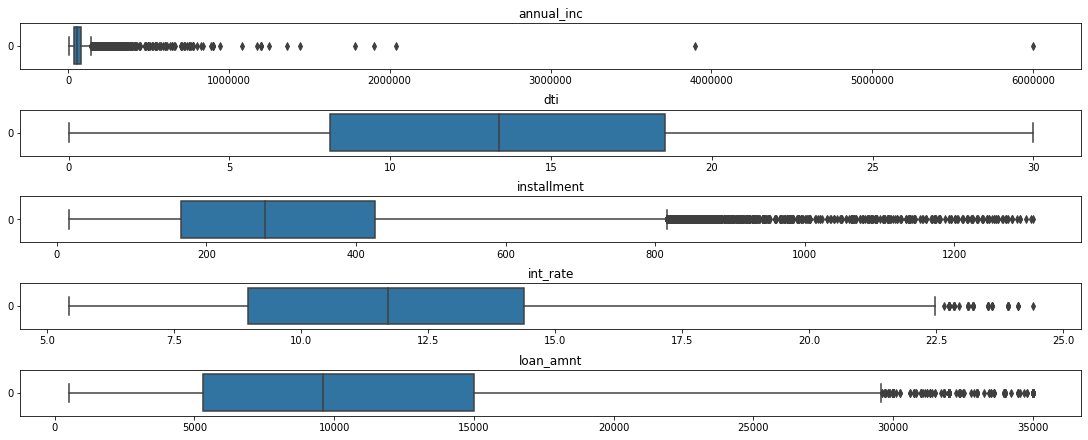

In [127]:
# boxplots for continous columns
fig, ax = plt.subplots(5, 1, figsize=[15, 6], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    sns.boxplot(data=df[col], orient='h', ax=ax[axi])
    ax[axi].set_title(col)
pass;

#### Treat Outliers

In [128]:
# removing outliers from annual_inc
df = df.loc[df['annual_inc'] <= (np.quantile(df['annual_inc'], 0.75) * 2)]
df.shape

(37384, 18)

In [129]:
# removing outliers from installment
df = df.loc[df['installment'] <= (np.quantile(df['installment'], 0.75) * 2)]
df.shape

(36394, 18)

In [130]:
# np.quantile(df['annual_inc'], 0.75) * 2.5
# np.quantile(df['installment'], 0.75) * 2.5

In [131]:
# dropped rows percentage
(38577 - 36394) / 38577

0.05658812245638593

#### Treat Missing Values

In [132]:
# missing proportion
df.isnull().sum() / len(df)

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.027697
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec_bankruptcies    0.018025
default                 0.000000
issue_month             0.000000
dtype: float64

In [133]:
# as the missing percentage is very small
# filling missing categorical values with mode
df['emp_length'].fillna(df['emp_length'].mode().values[0], inplace=True)
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode().values[0], inplace=True)

In [134]:
# df['emp_length'].mode().values[0]

#### Create More New Columns After Cleaning

In [135]:
# bin numerical into categorical
df['annual_inc_cat'] = pd.cut(df.annual_inc, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
df['loan_amnt_cat'] = pd.cut(df.loan_amnt, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
df['dti_cat'] = pd.cut(df.dti, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
df['int_rate_cat'] = pd.cut(df.int_rate, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
df['installment_cat'] = pd.cut(df.installment, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])

#### Checking Distributions for Numeric Variables

In [136]:
df[numeric_cols].describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,annual_inc,dti,installment,int_rate,loan_amnt
count,36394.000000,36394.000000,36394.000000,36394.000000,36394.000000
mean,61628.709223,13.369973,298.899595,11.806019,10309.641699
std,29634.211950,6.669807,176.837040,3.626658,6522.393474
min,4000.000000,0.000000,15.690000,5.420000,500.000000
5%,24000.000000,2.160000,68.916000,6.170000,2216.250000
10%,29004.000000,4.110000,97.399000,6.990000,3000.000000
25%,40000.000000,8.250000,162.250000,8.900000,5000.000000
50%,56000.000000,13.480000,266.090000,11.710000,9000.000000
75%,78000.000000,18.650000,398.520000,14.260000,14400.000000
90%,102996.000000,22.357000,552.551000,16.690000,20000.000000


## Analysis

#### Correlation Plot

Observations:
- There is a high correlation between `loan_amnt` and `installment`
- There is a mild correlation between `loan_amnt`, `int_rate` and `annual_inc`

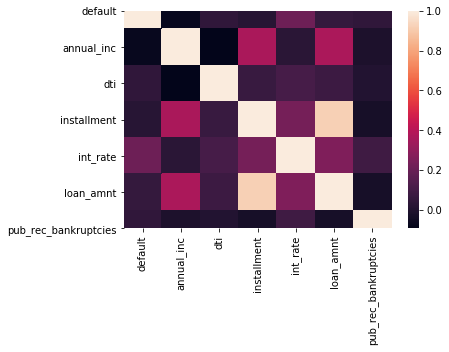

In [35]:
sns.heatmap(df[non_id_cols].corr())
pass;

### Univariate

#### Distributions

In [36]:
# # distributions for continous variables
# fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
# for axi, col in enumerate(numeric_cols):
#     sns.kdeplot(data=df, x=col, ax=ax[axi])
# pass;

In [37]:
# # distributions for categorical variables
# fig, ax = plt.subplots(figsize=[15, 1])
# sns.countplot(data=df, y='term', orient='h', ax=ax)
# fig, ax = plt.subplots(figsize=[15, 1])
# sns.countplot(data=df, y='verification_status', orient='h', ax=ax)
# fig, ax = plt.subplots(figsize=[15, 1])
# sns.countplot(data=df, y='pub_rec_bankruptcies', orient='h', ax=ax)
# fig, ax = plt.subplots(figsize=[15, 2])
# sns.countplot(data=df, y='home_ownership', orient='h', ax=ax)
# fig, ax = plt.subplots(figsize=[15, 3])
# order = sorted(set(df['emp_length']))
# sns.countplot(data=df, y='emp_length', orient='h', ax=ax, order=order)
# fig, ax = plt.subplots(figsize=[15, 3])
# order = sorted(set(df['grade']))
# sns.countplot(data=df, y='grade', orient='h', ax=ax, order=order)
# fig, ax = plt.subplots(figsize=[15, 7])
# order = sorted(set(df['sub_grade']))
# sns.countplot(data=df, y='sub_grade', orient='h', ax=ax, order=order)
# fig, ax = plt.subplots(figsize=[15, 5])
# order = df.groupby('purpose')['id'].agg('count').sort_values(ascending=False).index
# sns.countplot(data=df, y='purpose', orient='h', ax=ax, order=order)
# pass;

#### Distributions by loan_status

Similar distributions for both values of `loan_status` in continous variables.

/home/paresh/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/paresh/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/paresh/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/paresh/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `

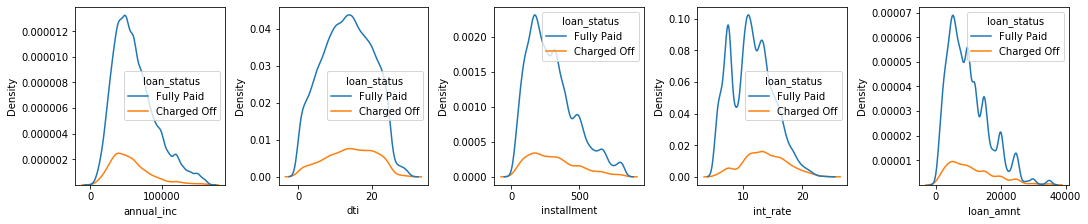

In [38]:
# distributions for continous variables
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    sns.kdeplot(data=df, x=col, ax=ax[axi], hue='loan_status')
pass;

In [140]:
# # distribution of default rate for continous_cat variables
# for col in numeric_cat_cols:
#     df.groupby(col)['default'].mean()

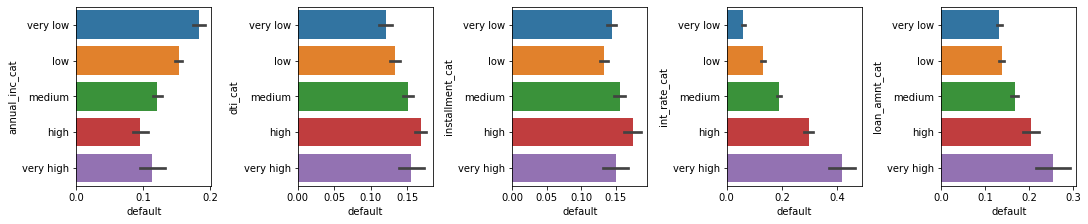

In [139]:
# distribution of default rate for continous_cat variables
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
for axi, col in enumerate(numeric_cat_cols):
    sns.barplot(data=df, y=col, ax=ax[axi], x='default', estimator=np.mean, orient='h')
pass;

Similar distributions for both values of `loan_status` in categorical variables except in `purpose`.

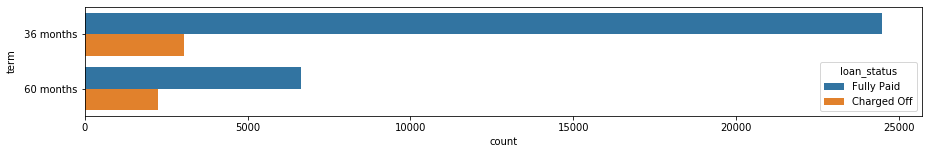

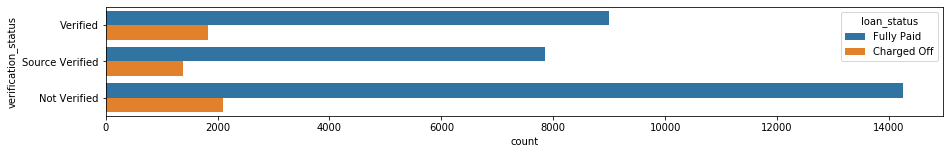

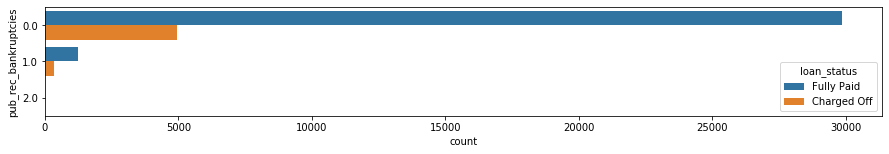

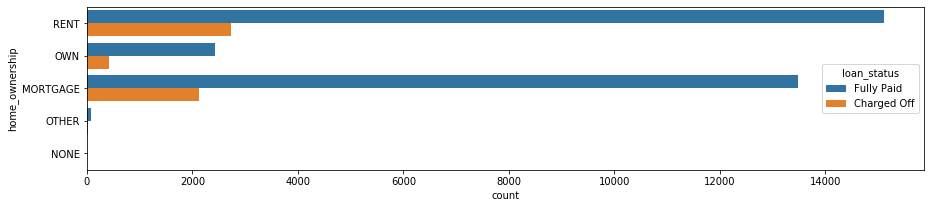

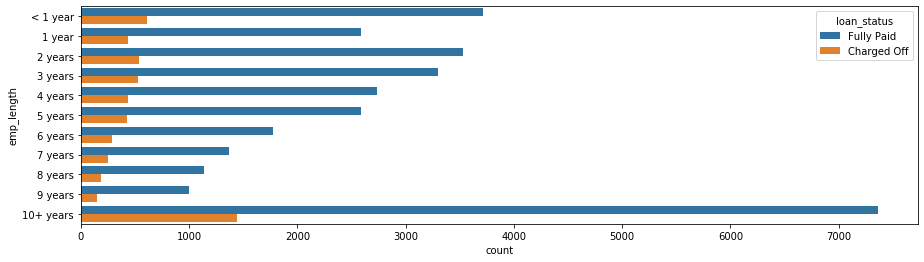

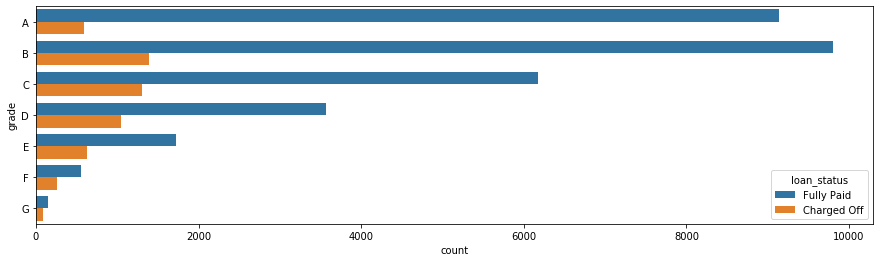

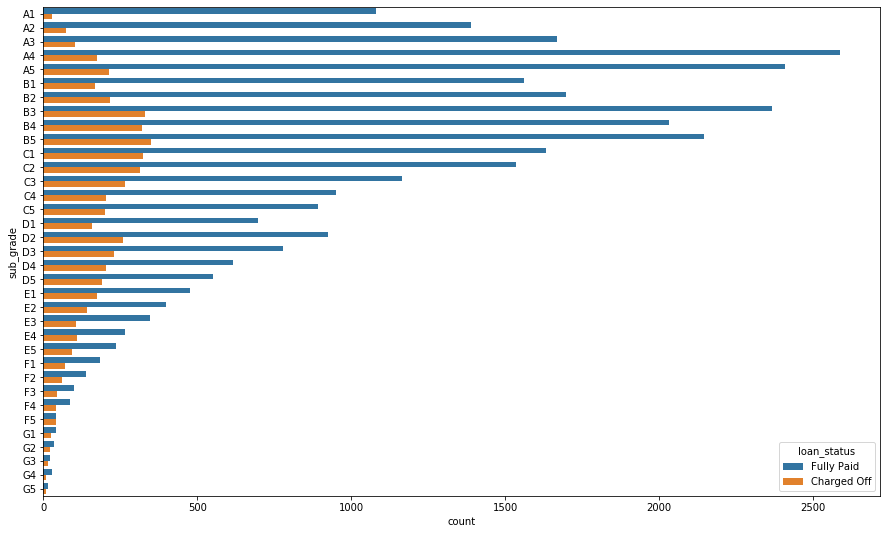

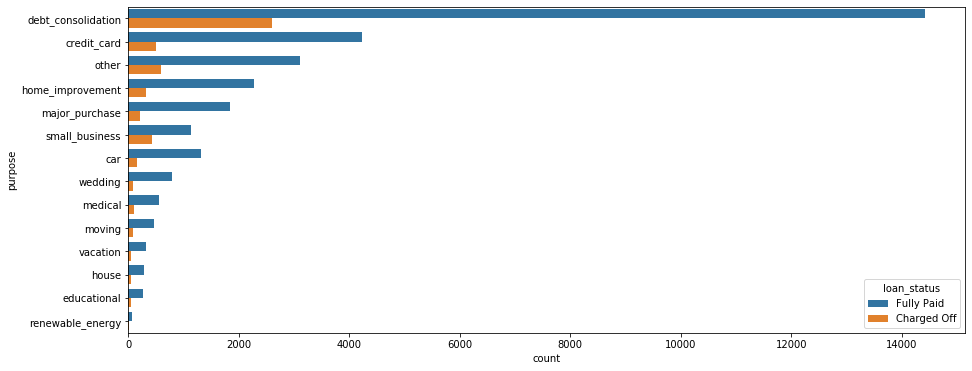

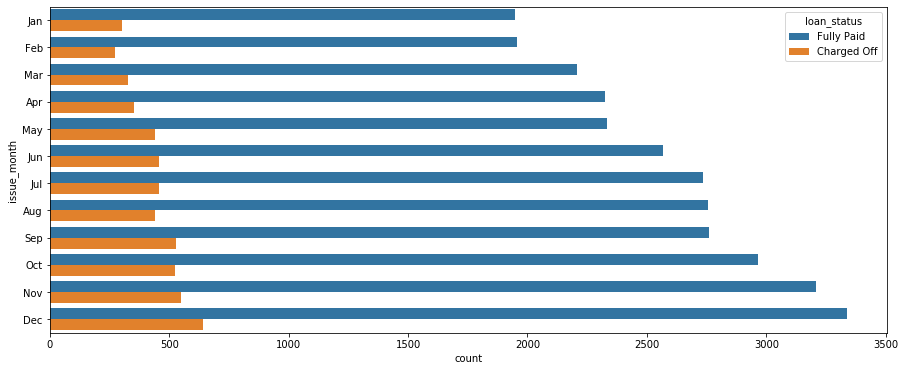

In [160]:
# distributions for categorical variables
fig, ax = plt.subplots(figsize=[15, 2])
sns.countplot(data=df, y='term', orient='h', ax=ax, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 2])
sns.countplot(data=df, y='verification_status', orient='h', ax=ax, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 2])
sns.countplot(data=df, y='pub_rec_bankruptcies', orient='h', ax=ax, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 3])
sns.countplot(data=df, y='home_ownership', orient='h', ax=ax, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 4])
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
         '7 years', '8 years', '9 years', '10+ years']
sns.countplot(data=df, y='emp_length', orient='h', ax=ax, order=order, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 4])
order = sorted(set(df['grade']))
sns.countplot(data=df, y='grade', orient='h', ax=ax, order=order, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 9])
order = sorted(set(df['sub_grade']))
sns.countplot(data=df, y='sub_grade', orient='h', ax=ax, order=order, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 6])
order = df.groupby('purpose')['id'].agg('count').sort_values(ascending=False).index
sns.countplot(data=df, y='purpose', orient='h', ax=ax, order=order, hue='loan_status')
fig, ax = plt.subplots(figsize=[15, 6])
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data=df, y='issue_month', orient='h', ax=ax, order=order, hue='loan_status')
pass;

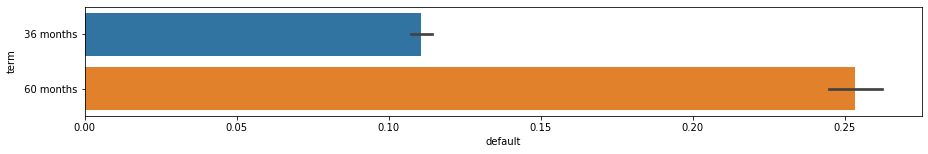

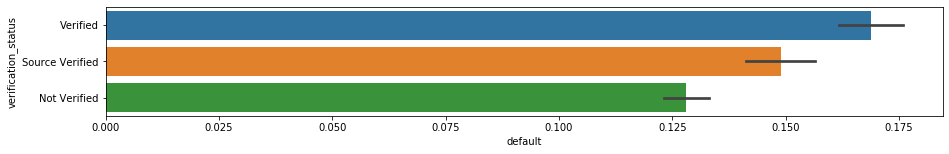

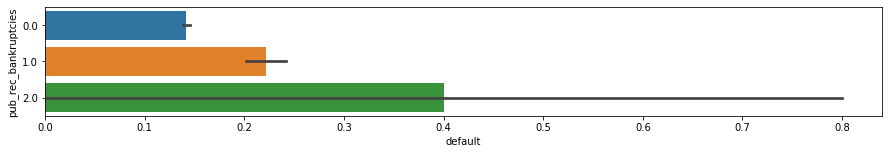

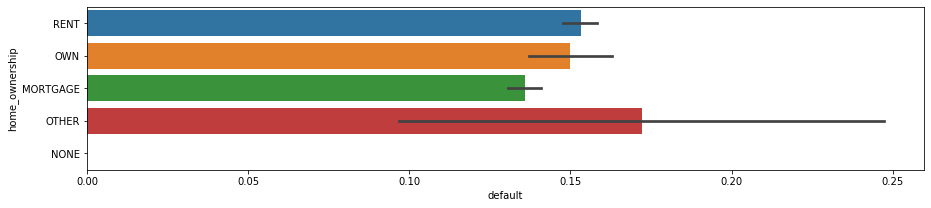

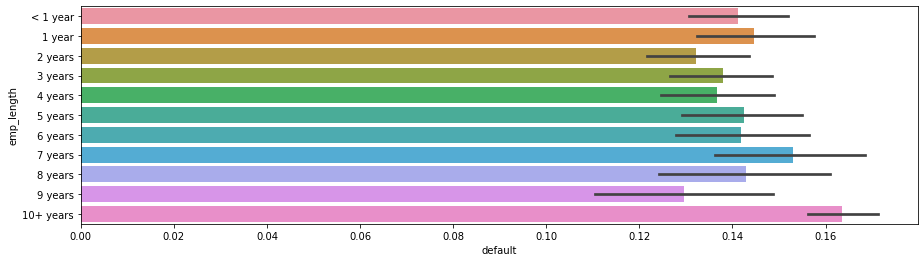

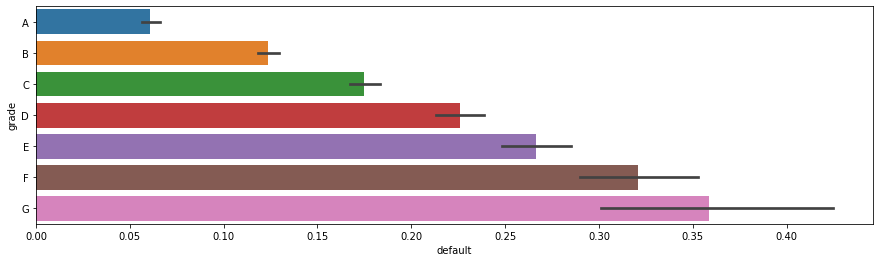

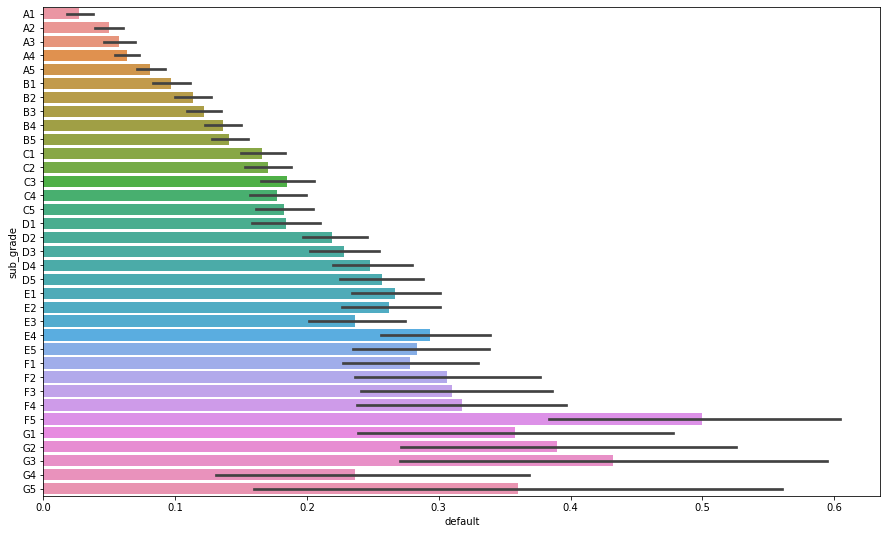

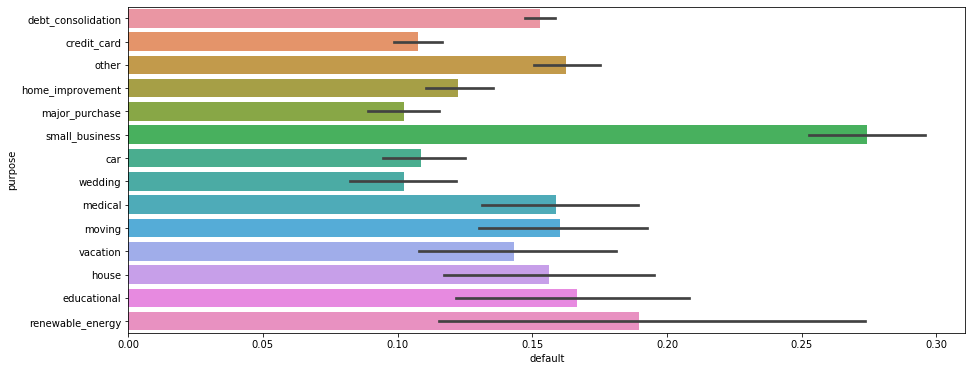

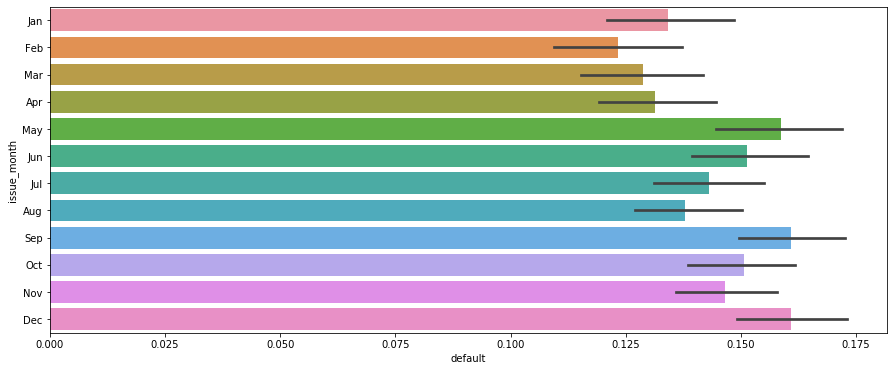

In [159]:
# distribution of default rate for categorical variables
# fig, ax = plt.subplots(8, 1, figsize=[15, 20], constrained_layout=True)
# for axi, col in enumerate(categorical_cols):
#     sns.barplot(data=df, y=col, ax=ax[axi], x='default', estimator=np.mean, orient='h')
# pass;

# distributions for categorical variables
fig, ax = plt.subplots(figsize=[15, 2])
sns.barplot(data=df, y='term', orient='h', ax=ax, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 2])
sns.barplot(data=df, y='verification_status', orient='h', ax=ax, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 2])
sns.barplot(data=df, y='pub_rec_bankruptcies', orient='h', ax=ax, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 3])
sns.barplot(data=df, y='home_ownership', orient='h', ax=ax, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 4])
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
         '7 years', '8 years', '9 years', '10+ years']
sns.barplot(data=df, y='emp_length', orient='h', ax=ax, order=order, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 4])
order = sorted(set(df['grade']))
sns.barplot(data=df, y='grade', orient='h', ax=ax, order=order, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 9])
order = sorted(set(df['sub_grade']))
sns.barplot(data=df, y='sub_grade', orient='h', ax=ax, order=order, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 6])
order = df.groupby('purpose')['id'].agg('count').sort_values(ascending=False).index
sns.barplot(data=df, y='purpose', orient='h', ax=ax, order=order, x='default', estimator=np.mean,)
fig, ax = plt.subplots(figsize=[15, 6])
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(data=df, y='issue_month', orient='h', ax=ax, order=order, x='default', estimator=np.mean,)
pass;

### Analysis

#### Median Values

In [40]:
# df.groupby('loan_status')['int_rate'].agg(lambda x: list(np.quantile(x, [0.25, 0.75])))
# df.groupby('loan_status')[numeric_cols].agg('mean')

In [41]:
# # checking if the difference in means is significant
# df_numeric_grp = df.groupby('loan_status')[numeric_cols].agg(list)
# ttest_dict = {}
# for col in numeric_cols:
#     ttest_stat = stats.ttest_ind(df_numeric_grp[col]['Charged Off'], 
#                     df_numeric_grp[col]['Fully Paid'], 
#                     equal_var=False)
#     ttest_dict[col] = [ttest_stat[1], 'significant' if ttest_stat[1] < 0.05 else 'not significant']
# ttest_dict['significance'] = ['pvalue', 'significance']
# pd.DataFrame.from_dict(ttest_dict).set_index('significance')

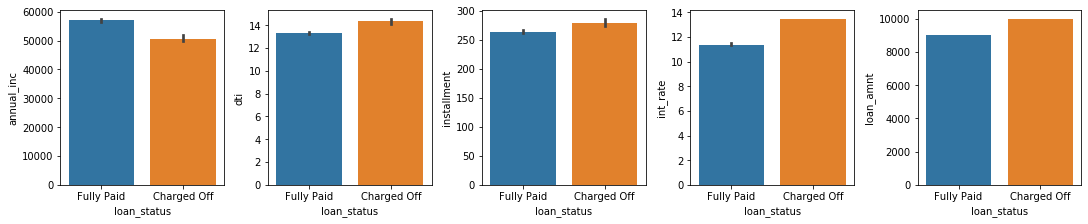

In [42]:
# median of numeric columns by loan_status
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    sns.barplot(data=df, y=col, x='loan_status', ax=ax[axi], estimator=np.median)
pass;

In [148]:
# median of numeric columns by loan_status
# fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
# for axi, col in enumerate(numeric_cat_cols):
#     sns.barplot(data=df, y=col, x='default', ax=ax[axi], estimator=np.mean)
# pass;

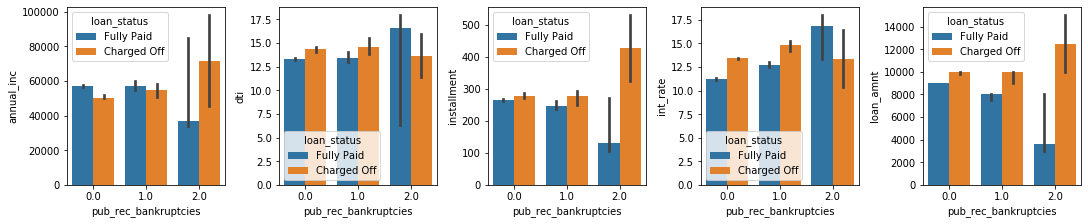

In [69]:
# median of numeric columns by pub_rec_bankruptcies
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    sns.barplot(data=df, y=col, x='pub_rec_bankruptcies', hue='loan_status', ax=ax[axi], estimator=np.median)
pass;

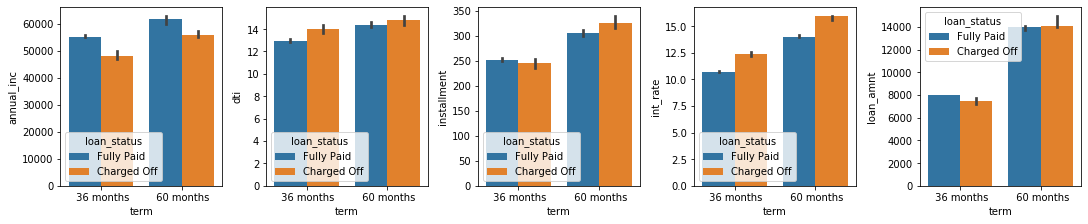

In [70]:
# median of numeric columns by term
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    sns.barplot(data=df, y=col, x='term', hue='loan_status', ax=ax[axi], estimator=np.median)
pass;

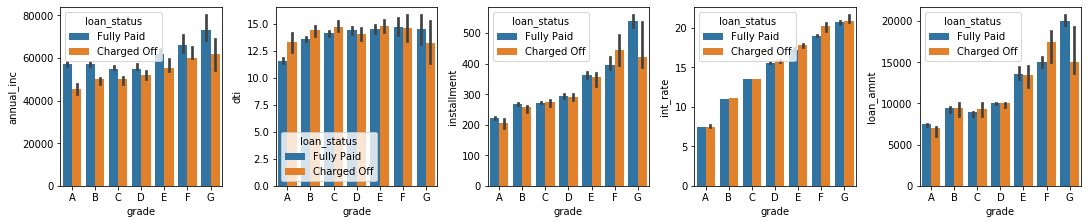

In [73]:
# median of numeric columns by grade
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
order = sorted(df.grade.unique().tolist())
for axi, col in enumerate(numeric_cols):
    sns.barplot(data=df, y=col, x='grade', hue='loan_status', ax=ax[axi], estimator=np.median, order=order)
pass;

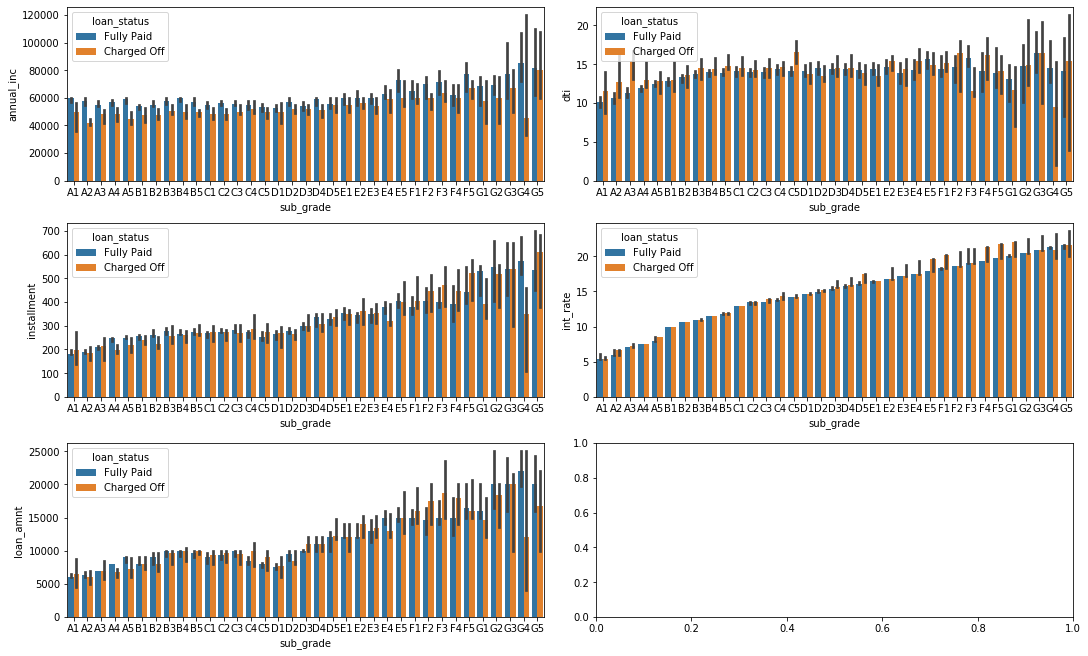

In [78]:
# median of numeric columns by sub_grade
fig, ax = plt.subplots(3, 2, figsize=[15, 9], constrained_layout=True)
order = sorted(df.sub_grade.unique().tolist())
for axi, col in enumerate(numeric_cols):
    if axi < 2:
        axes = ax[0, axi]
    elif axi < 4:
        axes = ax[1, axi%2]
    else:
        axes = ax[2, axi%2]
    sns.barplot(data=df, y=col, x='sub_grade', hue='loan_status', ax=axes, estimator=np.median, order=order)
pass;

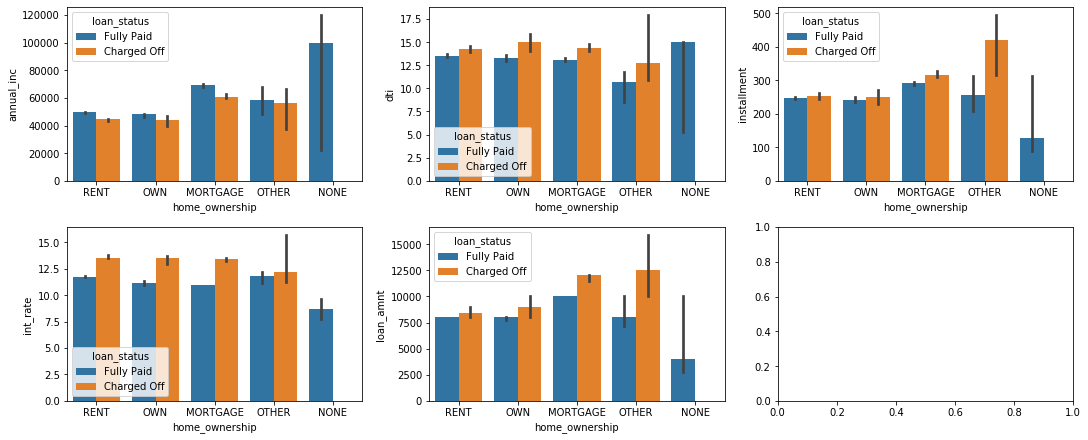

In [85]:
# median of numeric columns by home_ownership
fig, ax = plt.subplots(2, 3, figsize=[15, 6], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    if axi < 3:
        axes = ax[0, axi]
    else:
        axes = ax[1, axi%3]
    sns.barplot(data=df, y=col, x='home_ownership', hue='loan_status', ax=axes, estimator=np.median)
pass;

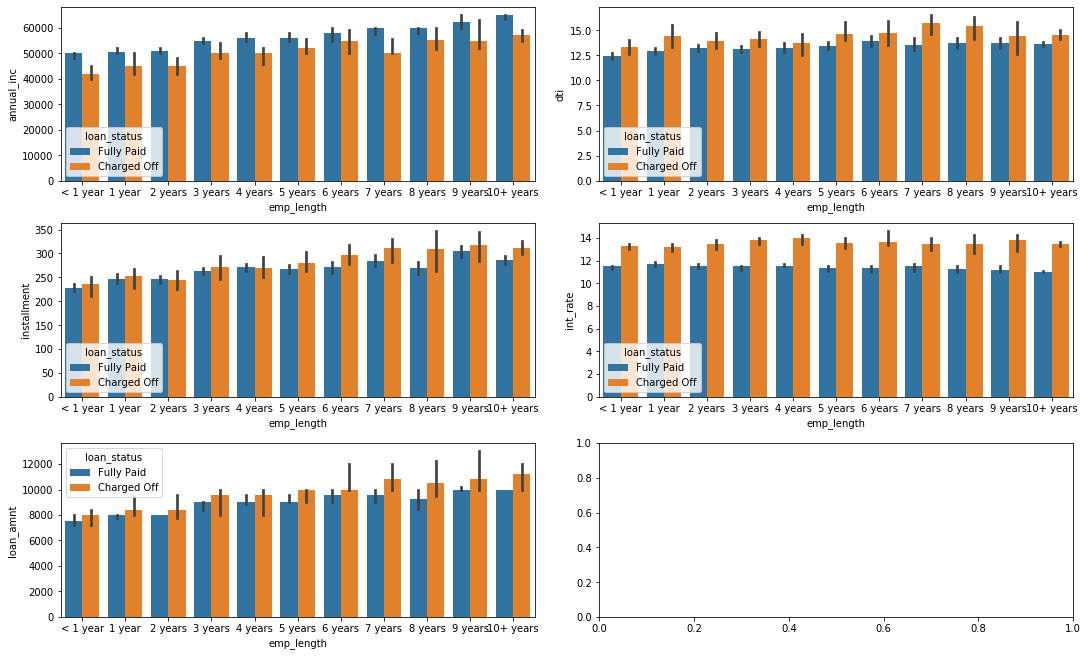

In [87]:
# median of numeric columns by emp_length
fig, ax = plt.subplots(3, 2, figsize=[15, 9], constrained_layout=True)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
         '7 years', '8 years', '9 years', '10+ years']
for axi, col in enumerate(numeric_cols):
    if axi < 2:
        axes = ax[0, axi]
    elif axi < 4:
        axes = ax[1, axi%2]
    else:
        axes = ax[2, axi%2]
    sns.barplot(data=df, y=col, x='emp_length', hue='loan_status', ax=axes, estimator=np.median, order=order)
pass;

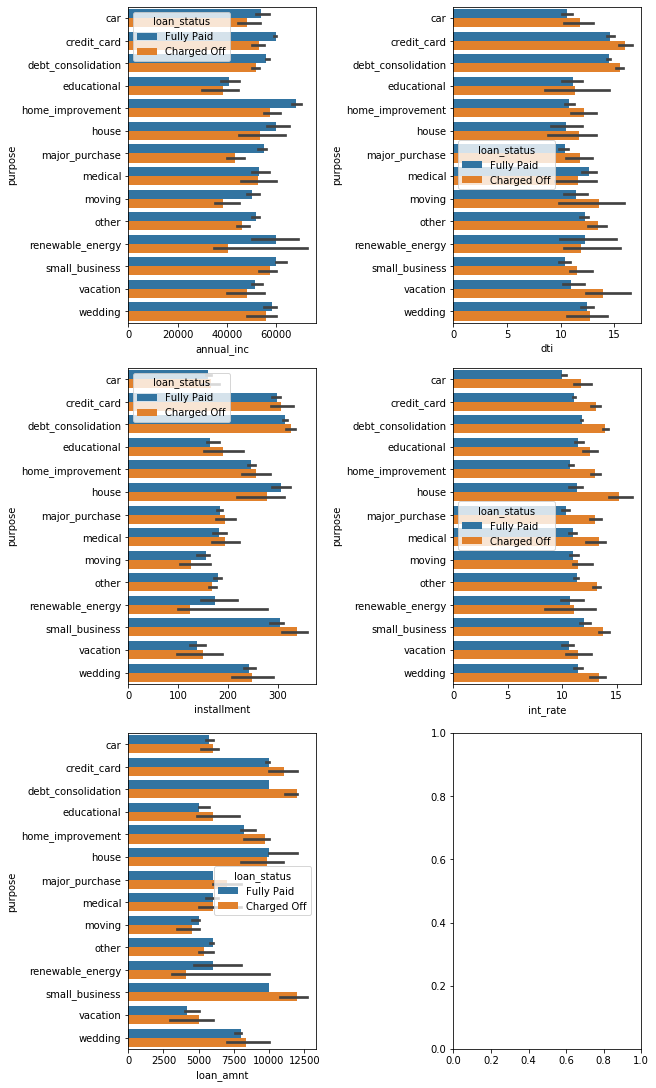

In [90]:
# median of numeric columns by purpose
fig, ax = plt.subplots(3, 2, figsize=[9, 15], constrained_layout=True)
order = sorted(df.purpose.unique().tolist())
for axi, col in enumerate(numeric_cols):
    if axi < 2:
        axes = ax[0, axi]
    elif axi < 4:
        axes = ax[1, axi%2]
    else:
        axes = ax[2, axi%2]
    sns.barplot(data=df, y='purpose', x=col, hue='loan_status', ax=axes, estimator=np.median, order=order, orient='h')
pass;

In [43]:
# sns.catplot(data=df, x='int_rate', y='pub_rec_bankruptcies', hue='loan_status', kind='bar', orient='h')

In [100]:
# sns.countplot(data=df, x='annual_inc_cat', hue='loan_status')

In [97]:
# # median of numeric columns by annual_inc_cat
# fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
# order = ['very low', 'low', 'medium', 'high', 'very high']
# for axi, col in enumerate(numeric_cols):
#     sns.barplot(data=df, y='annual_inc_cat', x=col, hue='loan_status', ax=ax[axi], estimator=np.median, order=order, orient='h')
# pass;

#### Analyzing Quantiles

In [44]:
# sns.catplot(data=df, y='purpose', x='annual_inc', hue='loan_status', col='term', kind='bar', orient='h')

In [45]:
# sns.catplot(data=df, y='purpose', hue='loan_status', col='term', kind='count', orient='h')

In [46]:
# for col in categorical_cols:
#     fig, ax = plt.subplots(figsize=[15, df[col].nunique()/3])
#     sns.boxplot(data=df, hue='loan_status', y=col, x='annual_inc', showfliers=False, orient='h', ax=ax)
# pass;

In [47]:
# generate median, 25% and 75% percentile data points
# for all numeric columns grouped by [category col, loan_status]
for col in categorical_cols:
    df.groupby([col, 'loan_status'])[numeric_cols].agg(
        [np.median, lambda x: np.quantile(x, 0.25), lambda x: np.quantile(x, 0.75), lambda x: '|']
    ).rename(columns={'<lambda_0>': 'quantile_25', '<lambda_1>': 'quantile_75', '<lambda_2>': '|'})

annual_inc                                dti  \
                           median quantile_25 quantile_75  |  median   
term       loan_status                                                 
 36 months Charged Off    48000.0     34800.0     66000.0  |  14.030   
           Fully Paid     55000.0     39996.0     77001.0  |  12.975   
 60 months Charged Off    55668.0     40000.0     75000.0  |  14.830   
           Fully Paid     61904.5     45000.0     85000.0  |  14.385   

                                                  installment              \
                       quantile_25 quantile_75  |      median quantile_25   
term       loan_status                                                      
 36 months Charged Off        8.73     19.0450  |     244.640    152.6425   
           Fully Paid         7.79     18.2400  |     250.825    156.8400   
 60 months Charged Off        9.89     19.8125  |     326.110    201.2950   
           Fully Paid         9.36     19.3600  |     305.205    192.7700   

                                      int_rate                             \
                       quantile_75  |   median quantile_25 quantile_75  |   
term       loan_status                                                      
 36 months Charged Off    374.3325  |    12.42       10.36       14.35  |   
           Fully Paid     386.7000  |    10.74        7.88       13.11  |   
 60 months Charged Off    464.1900  |    15.95       12.99       17.99  |   
           Fully Paid     443.4800  |    13.99       11.49       16.82  |   

                       loan_amnt                             
                          median quantile_25 quantile_75  |  
term       loan_status                                       
 36 months Charged Off      7500        4750       12000  |  
           Fully Paid       8000        5000       12000  |  
 60 months Charged Off     14125        8400       20000  |  
           Fully Paid      14000        8500       20000  |

annual_inc                                dti              \
                      median quantile_25 quantile_75  |  median quantile_25   
grade loan_status                                                             
A     Charged Off    45444.0    33612.00     63000.0  |  13.340       8.180   
      Fully Paid     57200.0    40000.00     78411.0  |  11.540       6.530   
B     Charged Off    50000.0    35001.00     69600.0  |  14.400       8.885   
      Fully Paid     57000.0    40000.00     79000.0  |  13.580       8.490   
C     Charged Off    50000.0    36000.00     69996.0  |  14.740       9.600   
      Fully Paid     55000.0    40000.00     78000.0  |  14.100       9.090   
D     Charged Off    52000.0    36416.84     70160.0  |  14.010       9.270   
      Fully Paid     55000.0    40000.00     76365.0  |  14.400       9.220   
E     Charged Off    55100.0    40353.00     75000.0  |  14.795      10.115   
      Fully Paid     62000.0    45000.00     85000.0  |  14.530       9.115   
F     Charged Off    60102.0    48720.00     78000.0  |  14.620       9.950   
      Fully Paid     66000.0    49182.00     91600.0  |  14.680       9.640   
G     Charged Off    62000.0    40000.00     81000.0  |  13.200       7.510   
      Fully Paid     73000.0    55000.00    105000.0  |  14.540       9.040   

                                 installment                             \
                  quantile_75  |      median quantile_25 quantile_75  |   
grade loan_status                                                         
A     Charged Off     18.9100  |     206.070    123.3900    311.1100  |   
      Fully Paid      17.1200  |     220.950    150.8000    317.2400  |   
B     Charged Off     19.3350  |     257.190    160.4175    393.3275  |   
      Fully Paid      18.6500  |     266.090    163.0800    402.5400  |   
C     Charged Off     19.8200  |     273.390    161.4700    404.2700  |   
      Fully Paid      18.9700  |     271.910    167.3400    410.0200  |   
D     Charged Off     19.3400  |     290.950    175.7700    418.3500  |   
      Fully Paid      19.1500  |     294.960    177.7000    423.6100  |   
E     Charged Off     19.6275  |     355.180    212.9950    507.7600  |   
      Fully Paid      19.4900  |     361.480    222.5700    529.7100  |   
F     Charged Off     18.8775  |     445.455    294.0200    591.0650  |   
      Fully Paid      19.2200  |     395.250    262.7750    559.3350  |   
G     Charged Off     19.5100  |     422.370    302.5100    612.6800  |   
      Fully Paid      18.7500  |     539.390    394.5800    669.0500  |   

                  int_rate                            loan_amnt              \
                    median quantile_25 quantile_75  |    median quantile_25   
grade loan_status                                                             
A     Charged Off     7.51        6.91        8.49  |    7000.0      4050.0   
      Fully Paid      7.49        6.62        7.88  |    7500.0      5000.0   
B     Charged Off    11.12       10.38       11.83  |    9475.0      5000.0   
      Fully Paid     10.99       10.37       11.71  |    9450.0      5000.0   
C     Charged Off    13.49       12.99       14.22  |    9300.0      5000.0   
      Fully Paid     13.49       12.99       13.99  |    9000.0      5000.0   
D     Charged Off    15.95       14.96       16.77  |   10000.0      6000.0   
      Fully Paid     15.58       14.91       16.29  |   10000.0      6000.0   
E     Charged Off    17.88       16.77       18.79  |   13400.0      8000.0   
      Fully Paid     17.19       16.45       18.39  |   13600.0      7900.0   
F     Charged Off    20.25       18.67       21.28  |   17412.5     10262.5   
      Fully Paid     18.99       18.30       20.62  |   15000.0     10000.0   
G     Charged Off    20.90       20.40       22.48  |   15000.0     10800.0   
      Fully Paid     20.77       20.16       21.59  |   20000.0     13000.0   

                                  
                  q

annual_inc                                dti  \
                          median quantile_25 quantile_75  |  median   
sub_grade loan_status                                                 
A1        Charged Off    50000.0    35138.50     60000.0  |  11.610   
          Fully Paid     60000.0    42000.00     80000.0  |  10.130   
A2        Charged Off    42000.0    35000.00     54000.0  |  12.730   
          Fully Paid     57465.5    40800.00     80000.0  |  10.680   
A3        Charged Off    48000.0    35001.00     68275.0  |  15.380   
...                          ...         ...         ... ..     ...   
G3        Fully Paid     77500.0    58000.00    110000.0  |  16.430   
G4        Charged Off    45600.0    35775.63     78000.0  |   9.500   
          Fully Paid     85000.0    60000.00    110000.0  |  14.500   
G5        Charged Off    80000.0    60000.00    105000.0  |  15.420   
          Fully Paid     82000.0    62300.00    118750.0  |  14.185   

                                                 installment              \
                      quantile_25 quantile_75  |      median quantile_25   
sub_grade loan_status                                                      
A1        Charged Off      7.0925      14.370  |     196.040    120.9175   
          Fully Paid       5.4400      15.460  |     182.620    120.6400   
A2        Charged Off      7.6700      19.450  |     184.230    121.6700   
          Fully Paid       5.7425      16.795  |     187.145    123.0700   
A3        Charged Off      8.9375      19.560  |     213.025    112.8300   
...                           ...         ... ..         ...         ...   
G3        Fully Paid      13.1500      20.890  |     539.390    379.5900   
G4        Charged Off      5.8400      13.200  |     348.010    283.1800   
          Fully Paid      11.1700      18.750  |     574.320    408.0900   
G5        Charged Off      4.0600      19.870  |     612.680    389.4500   
          Fully Paid       8.2250      18.400  |     535.750    445.7925   

                                     int_rate                             \
                      quantile_75  |   median quantile_25 quantile_75  |   
sub_grade loan_status                                                      
A1        Charged Off    301.6000  |     5.42      5.4200      6.0300  |   
          Fully Paid     304.3600  |     5.42      5.4200      6.0300  |   
A2        Charged Off    245.6300  |     6.62      5.9900      6.6200  |   
          Fully Paid     292.2275  |     5.99      5.7900      6.6200  |   
A3        Charged Off    307.5300  |     7.28      6.9900      7.5100  |   
...                           ... ..      ...         ...         ... ..   
G3        Fully Paid     647.2600  |    20.85     20.8500     20.9000  |   
G4        Charged Off    428.7700  |    20.86     20.7700     21.2700  |   
          Fully Paid     673.1100  |    21.27     20.7700     23.2200  |   
G5        Charged Off    623.4000  |    21.59     21.1400     21.6400  |   
          Fully Paid     704.5850  |    21.59     21.1925     22.1275  |   

                      loan_amnt                             
                         median quantile_25 quantile_75  |  
sub_grade loan_status                                       
A1        Charged Off    6500.0      4000.0    10000.00  |  
          Fully Paid     6000.0      4000.0    10000.00  |  
A2        Charged Off    6000.0      4000.0     8000.00  |  
          Fully Paid     6250.0      4000.0    10000.00  |  
A3        Charged Off    7000.0      3850.0    10000.00  |  
...                         ...         ...         ... ..  
G3        Fully Paid    20000.0     14075.0    24000.00  |  
G4        Charged Off   12000.0      7750.0    14500.00  |  
          Fully Paid    22000.0     15000.0    25000.00  |  
G5        Charged Off   16750.0     13650.0    21250.00  |  
          Fully Paid    20000.0     15625.0    24343.75  |  

[70 rows x 20 columns]

annual_inc                                dti  \
                           median quantile_25 quantile_75  |  median   
emp_length loan_status                                                 
1 year     Charged Off    45000.0    32167.00    62000.00  |  14.435   
           Fully Paid     50650.0    36000.00    72000.00  |  12.960   
10+ years  Charged Off    57000.0    41000.00    75000.00  |  14.570   
           Fully Paid     65000.0    48000.00    88000.00  |  13.640   
2 years    Charged Off    45000.0    33345.00    60000.00  |  13.935   
           Fully Paid     51000.0    37000.00    72000.00  |  13.250   
3 years    Charged Off    50000.0    36000.00    67050.00  |  14.150   
           Fully Paid     55000.0    39996.00    75000.00  |  13.160   
4 years    Charged Off    50000.0    36300.00    72000.00  |  13.710   
           Fully Paid     56000.0    40000.00    78000.00  |  13.235   
5 years    Charged Off    52000.0    38103.00    72000.00  |  14.580   
           Fully Paid     56000.0    40093.50    80000.00  |  13.470   
6 years    Charged Off    54704.0    38400.00    75000.00  |  14.680   
           Fully Paid     58037.5    40950.00    80000.00  |  13.935   
7 years    Charged Off    50068.0    38300.00    70000.00  |  15.715   
           Fully Paid     60000.0    44160.00    79894.00  |  13.530   
8 years    Charged Off    55154.0    40000.00    78264.25  |  15.425   
           Fully Paid     60000.0    45000.00    82000.00  |  13.760   
9 years    Charged Off    55000.0    43200.00    73716.00  |  14.410   
           Fully Paid     62400.0    46873.12    85000.00  |  13.740   
< 1 year   Charged Off    42000.0    30000.00    62500.00  |  13.320   
           Fully Paid     50000.0    34000.00    74719.50  |  12.460   

                                                  installment              \
                       quantile_25 quantile_75  |      median quantile_25   
emp_length loan_status                                                      
1 year     Charged Off      8.9900     19.5700  |     252.895    147.5450   
           Fully Paid       7.6950     18.1100  |     247.110    155.6300   
10+ years  Charged Off      9.5350     19.9000  |     312.040    174.4350   
           Fully Paid       8.4000     18.8100  |     285.950    168.6200   
2 years    Charged Off      8.4000     19.0550  |     245.125    157.8200   
           Fully Paid       7.9300     18.2575  |     246.085    156.4100   
3 years    Charged Off      9.2325     18.8900  |     272.005    158.9375   
           Fully Paid       7.9675     18.2900  |     263.180    162.7300   
4 years    Charged Off      8.3300     18.9200  |     269.490    161.3400   
           Fully Paid       8.0000     18.4675  |     272.130    166.6375   
5 years    Charged Off      9.4725     19.9150  |     279.990    182.3750   
           Fully Paid       8.1050     18.7000  |     266.870    164.8525   
6 years    Charged Off      9.3500     19.8600  |     297.530    177.9200   
           Fully Paid       8.8675     19.0225  |     271.600    166.4300   
7 years    Charged Off     11.0675     19.1675  |     311.860    193.7650   
           Fully Paid       8.4100     18.8400  |     284.070    170.5400   
8 years    Charged Off     10.6550     19.7600  |     309.325    169.6850   
           Fully Paid       8.9100     19.2150  |     269.960    168.9100   
9 years    Charged Off      8.7200     18.9900  |     318.350    215.6900   
           Fully Paid       8.7500     18.4900  |     305.380    184.6100   
< 1 year   Charged Off      8.3075     18.3325  |     235.155    138.1225   
           Fully Paid       7.1250     17.8350  |     228.710    140.6200   

                                      int_rate                             \
                       quantile_75  |   median quantile_25 quantile_75  |   
emp_length loan_status                                                      
1 year     Charged Off    387.1400  |   13.160       11.14     15

annual_inc                                dti  \
                               median quantile_25 quantile_75  |  median   
home_ownership loan_status                                                 
MORTGAGE       Charged Off    60798.0     46000.0   82000.000  |  14.370   
               Fully Paid     69000.0     50000.0   92000.000  |  13.095   
NONE           Fully Paid    100000.0     61100.0  110000.000  |  15.000   
OTHER          Charged Off    56250.0     37100.0   67387.000  |  12.730   
               Fully Paid     58600.0     40000.0   82000.000  |  10.640   
OWN            Charged Off    44000.0     31221.5   60000.000  |  15.020   
               Fully Paid     48000.0     32000.0   67215.315  |  13.300   
RENT           Charged Off    45000.0     32000.0   60000.000  |  14.270   
               Fully Paid     50000.0     36000.0   67611.000  |  13.540   

                                                      installment              \
                           quantile_25 quantile_75  |      median quantile_25   
home_ownership loan_status                                                      
MORTGAGE       Charged Off      9.7200     19.3700  |     317.205    192.8850   
               Fully Paid       8.0600     18.1200  |     291.500    178.4150   
NONE           Fully Paid      10.1200     15.0000  |     128.410    108.5300   
OTHER          Charged Off     10.7925     18.1275  |     420.865    316.6175   
               Fully Paid       6.7600     15.3200  |     255.580    165.0700   
OWN            Charged Off      8.0300     20.0950  |     250.410    151.1300   
               Fully Paid       7.8100     18.7050  |     242.470    152.3625   
RENT           Charged Off      8.8850     19.2900  |     252.250    152.8300   
               Fully Paid       8.1975     18.7825  |     248.080    154.3700   

                                          int_rate                             \
                           quantile_75  |   median quantile_25 quantile_75  |   
home_ownership loan_status                                                      
MORTGAGE       Charged Off    468.9975  |    13.43      10.990       16.02  |   
               Fully Paid     432.2500  |    10.99       7.880       13.49  |   
NONE           Fully Paid     220.3150  |     8.70       8.225        9.17  |   
OTHER          Charged Off    501.3925  |    12.21      11.230       15.76  |   
               Fully Paid     425.6400  |    11.83       9.630       13.47  |   
OWN            Charged Off    395.9400  |    13.48      11.030       16.29  |   
               Fully Paid     371.4325  |    11.12       7.900       13.61  |   
RENT           Charged Off    385.0750  |    13.57      11.480       16.29  |   
               Fully Paid     375.3400  |    11.71       9.450       14.17  |   

                           loan_amnt                             
                              median quantile_25 quantile_75  |  
home_ownership loan_status                                       
MORTGAGE       Charged Off     12000        6525     18000.0  |  
               Fully Paid      10000        6000     15000.0  |  
NONE           Fully Paid       4000        3400      7000.0  |  
OTHER          Charged Off     12500        9900     15887.5  |  
               Fully Paid       8000        5600     14700.0  |  
OWN            Charged Off      9000        5000     15000.0  |  
               Fully Paid       8000        5000     12500.0  |  
RENT           Charged Off      8400        5000     14112.5  |  
               Fully Paid       8000        5000     12000.0  |

annual_inc                                dti  \
                                    median quantile_25 quantile_75  |  median   
verification_status loan_status                                                 
Not Verified        Charged Off    48000.0     34000.0    64598.25  |  14.435   
                    Fully Paid     52000.0     38114.5    72000.00  |  12.970   
Source Verified     Charged Off    50000.0     36000.0    68850.00  |  13.140   
                    Fully Paid     55000.0     39510.0    75000.00  |  12.760   
Verified            Charged Off    58000.0     41600.0    79864.00  |  15.470   
                    Fully Paid     66000.0     48000.0    90000.00  |  14.390   

                                                           installment  \
                                quantile_25 quantile_75  |      median   
verification_status loan_status                                          
Not Verified        Charged Off      9.0325       19.15  |     221.830   
                    Fully Paid       7.8450       18.11  |     220.740   
Source Verified     Charged Off      8.0250       18.21  |     248.520   
                    Fully Paid       7.5650       17.94  |     246.070   
Verified            Charged Off     10.4800       20.40  |     386.990   
                    Fully Paid       9.0600       19.67  |     368.755   

                                                           int_rate  \
                                quantile_25 quantile_75  |   median   
verification_status loan_status                                       
Not Verified        Charged Off    135.3500    338.9525  |    12.69   
                    Fully Paid     141.6850    330.7600  |    10.99   
Source Verified     Charged Off    149.9700    364.8550  |    13.99   
                    Fully Paid     155.5100    364.4450  |    11.49   
Verified            Charged Off    245.5800    529.7100  |    14.27   
                    Fully Paid     237.0325    528.9050  |    12.18   

                                                           loan_amnt  \
                                quantile_25 quantile_75  |    median   
verification_status loan_status                                        
Not Verified        Charged Off      10.620       14.74  |      7500   
                    Fully Paid        7.900       13.22  |      7200   
Source Verified     Charged Off      11.425       16.49  |      9000   
                    Fully Paid        7.900       14.22  |      8000   
Verified            Charged Off      11.860       17.43  |     15000   
                    Fully Paid        9.910       14.84  |     13250   

                                                            
                                quantile_25 quantile_75  |  
verification_status loan_status                             
Not Verified        Charged Off     4743.75       12000  |  
                    Fully Paid      4800.00       11000  |  
Source Verified     Charged Off     5000.00       14000  |  
                    Fully Paid      5000.00       12000  |  
Verified            Charged Off     8875.00       20400  |  
                    Fully Paid      8000.00       20000  |

annual_inc                                dti  \
                                   median quantile_25 quantile_75  |  median   
purpose            loan_status                                                 
car                Charged Off   48000.00  34950.0000     70000.0  |  11.830   
                   Fully Paid    54000.00  38000.0000     75000.0  |  10.545   
credit_card        Charged Off   53000.00  39000.0000     74936.0  |  16.040   
                   Fully Paid    60000.00  43000.0000     81000.0  |  14.610   
debt_consolidation Charged Off   51701.74  37000.0000     70000.0  |  15.540   
                   Fully Paid    56004.00  40116.1200     76700.0  |  14.460   
educational        Charged Off   38502.00  24900.0000     55500.0  |  11.305   
                   Fully Paid    40900.00  26175.0000     65000.0  |  11.170   
home_improvement   Charged Off   57321.50  42000.0000     80000.0  |  12.150   
                   Fully Paid    68002.00  48000.0000     95000.0  |  10.805   
house              Charged Off   53500.00  34479.6600     75750.0  |  11.705   
                   Fully Paid    60000.00  42000.0000     80000.0  |  10.460   
major_purchase     Charged Off   43200.00  30000.0000     60000.0  |  11.770   
                   Fully Paid    55000.00  38000.0000     76800.0  |  10.390   
medical            Charged Off   52500.00  35750.0000     73098.0  |  11.630   
                   Fully Paid    53000.00  38250.0000     77500.0  |  12.660   
moving             Charged Off   38400.00  30000.0000     55750.0  |  13.595   
                   Fully Paid    50000.00  33998.0000     73250.0  |  11.440   
other              Charged Off   45996.00  31125.0000     65000.0  |  13.470   
                   Fully Paid    51996.00  36000.0000     75000.0  |  12.270   
renewable_energy   Charged Off   40500.00  33243.9075     73750.0  |  11.875   
                   Fully Paid    60000.00  36000.0000     85000.0  |  12.250   
small_business     Charged Off   57300.00  40000.0000     74775.0  |  11.565   
                   Fully Paid    60000.00  42615.0000     85000.0  |  10.355   
vacation           Charged Off   48000.00  36000.0000     63000.0  |  13.970   
                   Fully Paid    51600.00  37648.0000     75000.0  |  10.980   
wedding            Charged Off   55980.00  38549.0000     74087.2  |  12.700   
                   Fully Paid    58295.00  42000.0000     75000.0  |  12.490   

                                                          installment  \
                               quantile_25 quantile_75  |      median   
purpose            loan_status                                          
car                Charged Off      6.8050     16.7525  |     166.255   
                   Fully Paid       5.1825     16.2575  |     160.030   
credit_card        Charged Off     11.0950     20.2750  |     306.380   
                   Fully Paid       9.9700     19.3450  |     298.650   
debt_consolidation Charged Off     10.7900     20.0500  |     326.485   
                   Fully Paid       9.5700     19.4000  |     314.250   
educational        Charged Off      3.4400     18.4500  |     189.970   
                   Fully Paid       6.2800     15.6150  |     164.440   
home_improvement   Charged Off      6.5625     17.6150  |     255.605   
                   Fully Paid       5.7975     16.4275  |     246.755   
house              Charged Off      7.6000     15.2725  |     277.775   
                   Fully Paid       4.4300     15.8100  |     307.040   
major_purchase     Charged Off      6.2050     16.4200  |     194.390   
                   Fully Paid       5.2900     15.5500  |     184.500   
medical            Charged Off      6.5900     17.5100  |     194.485   
                   Fully Paid       6.6400     17.8800  |     183.240   
moving             Charged Off      6.8025     18.3425  |     126.690   
                   Fully Paid       5.7650     17.0950  |     155.900   
other            

annual_inc                             \
                                     median quantile_25 quantile_75  |   
pub_rec_bankruptcies loan_status                                         
0.0                  Charged Off    50132.0     36000.0     70000.0  |   
                     Fully Paid     57000.0     40000.0     80000.0  |   
1.0                  Charged Off    55000.0     40000.0     72750.0  |   
                     Fully Paid     57000.0     40800.0     77000.0  |   
2.0                  Charged Off    71800.0     58700.0     84900.0  |   
                     Fully Paid     37100.0     35550.0     61050.0  |   

                                     dti                             \
                                  median quantile_25 quantile_75  |   
pub_rec_bankruptcies loan_status                                      
0.0                  Charged Off  14.340      9.0500     19.4000  |   
                     Fully Paid   13.310      8.0725     18.5300  |   
1.0                  Charged Off  14.590     10.4300     19.1850  |   
                     Fully Paid   13.450      8.3500     18.4100  |   
2.0                  Charged Off  13.665     12.5375     14.7925  |   
                     Fully Paid   16.620     11.4850     17.2700  |   

                                 installment                             \
                                      median quantile_25 quantile_75  |   
pub_rec_bankruptcies loan_status                                          
0.0                  Charged Off      279.16     165.060     420.420  |   
                     Fully Paid       264.45     162.210     396.920  |   
1.0                  Charged Off      276.98     167.185     376.620  |   
                     Fully Paid       247.00     157.980     355.620  |   
2.0                  Charged Off      427.35     375.860     478.840  |   
                     Fully Paid       130.14     118.415     200.525  |   

                                 int_rate                             \
                                   median quantile_25 quantile_75  |   
pub_rec_bankruptcies loan_status                                       
0.0                  Charged Off    13.48      11.110      16.020  |   
                     Fully Paid     11.26       8.070      13.800  |   
1.0                  Charged Off    14.79      12.610      16.820  |   
                     Fully Paid     12.69      10.740      14.830  |   
2.0                  Charged Off    13.38      11.870      14.890  |   
                     Fully Paid     16.82      15.085      17.405  |   

                                 loan_amnt                             
                                    median quantile_25 quantile_75  |  
pub_rec_bankruptcies loan_status                                       
0.0                  Charged Off     10000        5200       15250  |  
                     Fully Paid       9000        5000       14000  |  
1.0                  Charged Off     10000        5350       15000  |  
                     Fully Paid       8000        5000       12000  |  
2.0                  Charged Off     12500       11250       13750  |  
                     Fully Paid       3600        3300        5800  |

annual_inc                                dti  \
                            median quantile_25 quantile_75  |  median   
issue_month loan_status                                                 
Apr         Charged Off    50000.0     34000.0     70000.0  |  14.385   
            Fully Paid     54000.0     39467.0     76000.0  |  13.190   
Aug         Charged Off    51736.5     36000.0     68550.0  |  14.020   
            Fully Paid     58000.0     40824.0     80000.0  |  13.400   
Dec         Charged Off    51500.0     38003.0     70000.0  |  15.235   
            Fully Paid     56510.0     40000.0     79800.0  |  13.560   
Feb         Charged Off    53000.0     36000.0     72000.0  |  13.440   
            Fully Paid     55000.0     40000.0     76513.5  |  13.430   
Jan         Charged Off    53790.0     36997.0     71700.0  |  13.485   
            Fully Paid     60000.0     40000.0     81250.0  |  13.410   
Jul         Charged Off    50000.0     36729.6     70000.0  |  14.410   
            Fully Paid     57000.0     40800.0     78000.0  |  12.950   
Jun         Charged Off    50000.0     35004.0     69425.0  |  14.680   
            Fully Paid     58000.0     40000.0     80000.0  |  13.100   
Mar         Charged Off    50045.7     39000.0     66000.0  |  14.440   
            Fully Paid     55000.0     40000.0     78000.0  |  13.125   
May         Charged Off    49896.0     35000.0     66000.0  |  14.870   
            Fully Paid     56000.0     40000.0     77200.0  |  13.340   
Nov         Charged Off    50400.0     36000.0     73810.5  |  14.290   
            Fully Paid     57502.0     40000.0     80000.0  |  13.260   
Oct         Charged Off    50000.0     35000.0     69600.0  |  14.340   
            Fully Paid     58000.0     40000.0     80133.5  |  13.560   
Sep         Charged Off    54000.0     38000.0     73400.0  |  13.740   
            Fully Paid     58560.0     40428.0     80000.0  |  13.290   

                                                   installment              \
                        quantile_25 quantile_75  |      median quantile_25   
issue_month loan_status                                                      
Apr         Charged Off      8.8700     19.4025  |     273.085    163.5350   
            Fully Paid       8.0150     18.5000  |     250.250    156.5600   
Aug         Charged Off      8.7075     19.1200  |     251.550    142.4300   
            Fully Paid       8.3200     18.7200  |     262.425    157.8200   
Dec         Charged Off     10.2225     20.2500  |     331.880    188.0125   
            Fully Paid       8.6800     18.6400  |     304.770    182.6200   
Feb         Charged Off      8.6200     18.5700  |     298.260    156.6250   
            Fully Paid       8.2350     18.6850  |     279.090    172.2275   
Jan         Charged Off      7.7975     18.3300  |     278.165    167.8100   
            Fully Paid       7.6950     18.1650  |     274.500    170.1700   
Jul         Charged Off      9.0500     19.8600  |     266.880    162.7600   
            Fully Paid       8.0300     18.3500  |     247.300    154.1250   
Jun         Charged Off      9.4050     19.4975  |     249.610    148.4875   
            Fully Paid       7.9300     18.3300  |     239.640    150.8000   
Mar         Charged Off      8.7225     20.0825  |     289.100    170.6450   
            Fully Paid       7.8600     18.3625  |     270.170    167.8125   
May         Charged Off      9.5925     19.7050  |     248.405    149.9525   
            Fully Paid       8.0600     18.5400  |     249.580    153.8500   
Nov         Charged Off      9.8000     19.1350  |     292.880    179.2000   
            Fully Paid       8.1275     18.4300  |     265.180    162.8700   
Oct         Charged Off      8.9400     19.3850  |     277.180    165.0275   
            Fully Paid       8.0900     18.6850  |     271.140    161.9100   
Sep         Charged Off      9.2400     18.8900  |     297.080    167.6500   
            Fully Paid  

In [161]:
# for cat_col in categorical_cols:
#     fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
#     for axi, num_col in enumerate(numeric_cat_cols):
#         sns.barplot(data=df, y=cat_col, x='default', hue=num_col, orient='h', estimator=np.mean,  ax=ax[axi])
# pass;

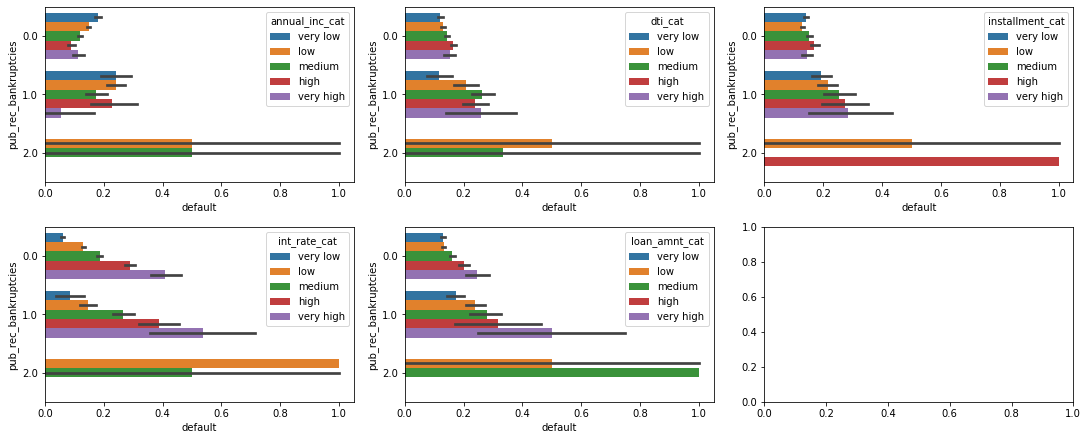

In [180]:
# mean default of numeric columns by pub_rec_bankruptcies
fig, ax = plt.subplots(2, 3, figsize=[15, 6], constrained_layout=True)
for axi, col in enumerate(numeric_cat_cols):
    axes = ax[0, axi] if axi < 3 else ax[1, axi%3]
    sns.barplot(data=df, x='default', y='pub_rec_bankruptcies', hue=col, ax=axes, estimator=np.mean, orient='h')
pass;

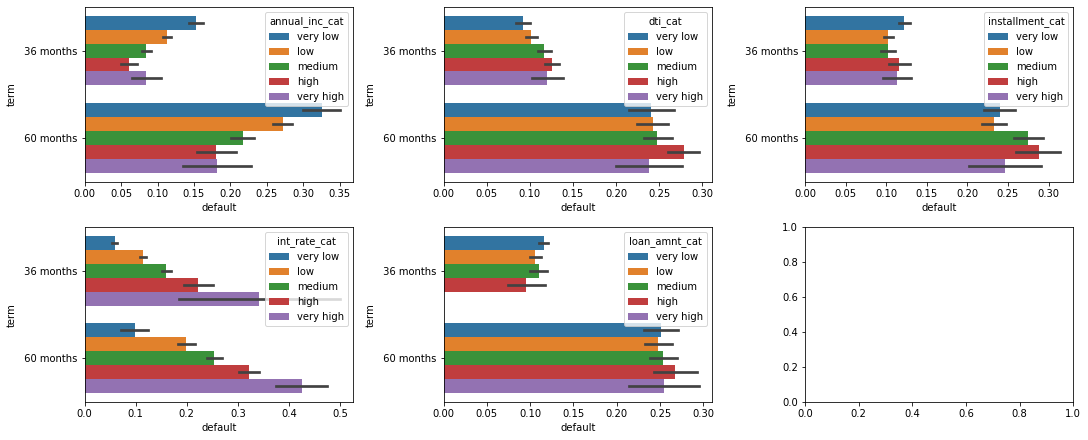

In [179]:
# mean default of numeric columns by term
fig, ax = plt.subplots(2, 3, figsize=[15, 6], constrained_layout=True)
for axi, col in enumerate(numeric_cat_cols):
    axes = ax[0, axi] if axi < 3 else ax[1, axi%3]
    sns.barplot(data=df, x='default', y='term', hue=col, ax=axes, estimator=np.mean, orient='h')
pass;

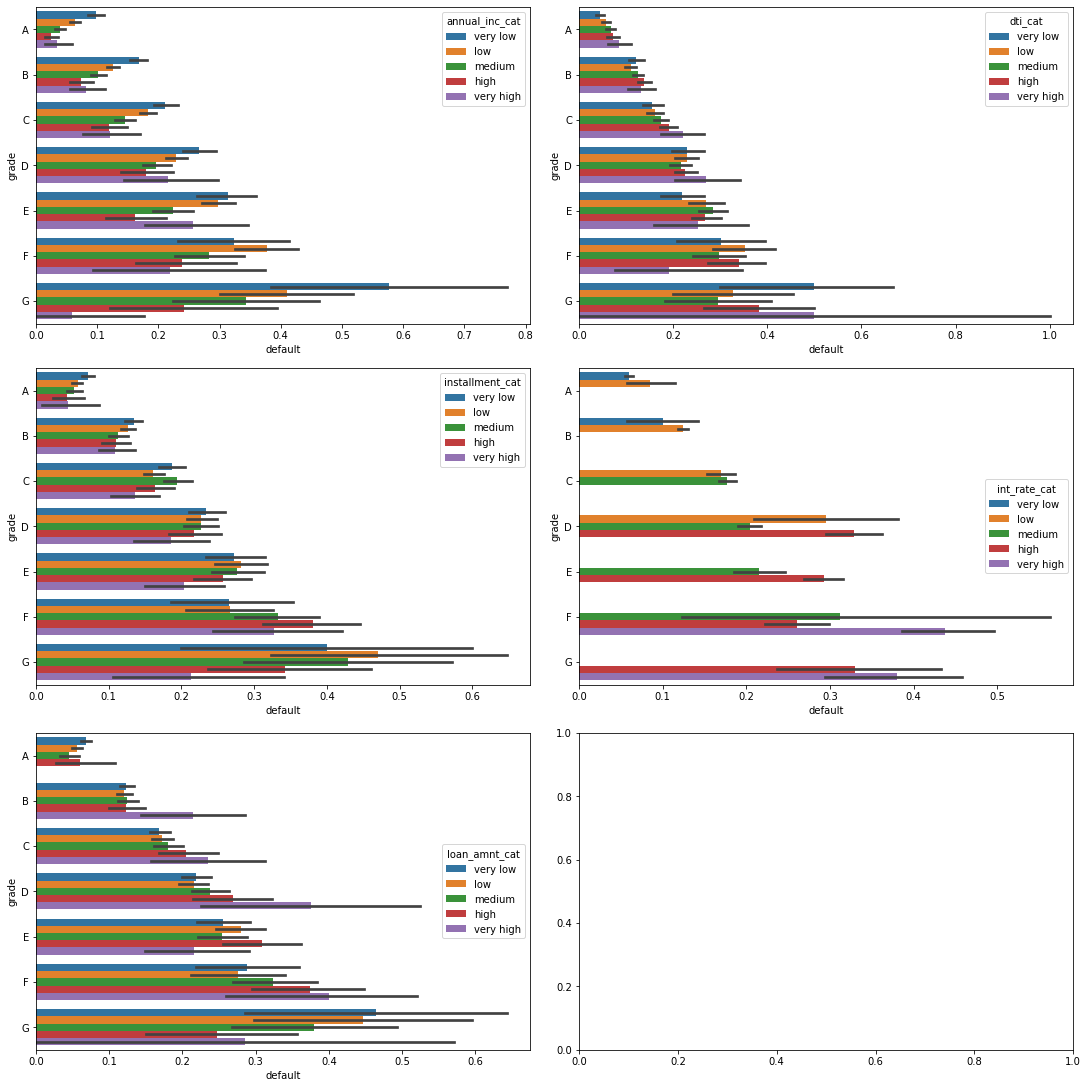

In [182]:
# mean default of numeric columns by grade
fig, ax = plt.subplots(3, 2, figsize=[15, 15], constrained_layout=True)
order = sorted(df.grade.unique().tolist())
for axi, col in enumerate(numeric_cat_cols):
    if axi < 2:
        axes = ax[0, axi]
    elif axi < 4:
        axes = ax[1, axi%2]
    else:
        axes = ax[2, axi%2]
    sns.barplot(data=df, x='default', y='grade', hue=col, ax=axes, estimator=np.mean, orient='h', order=order)
pass;

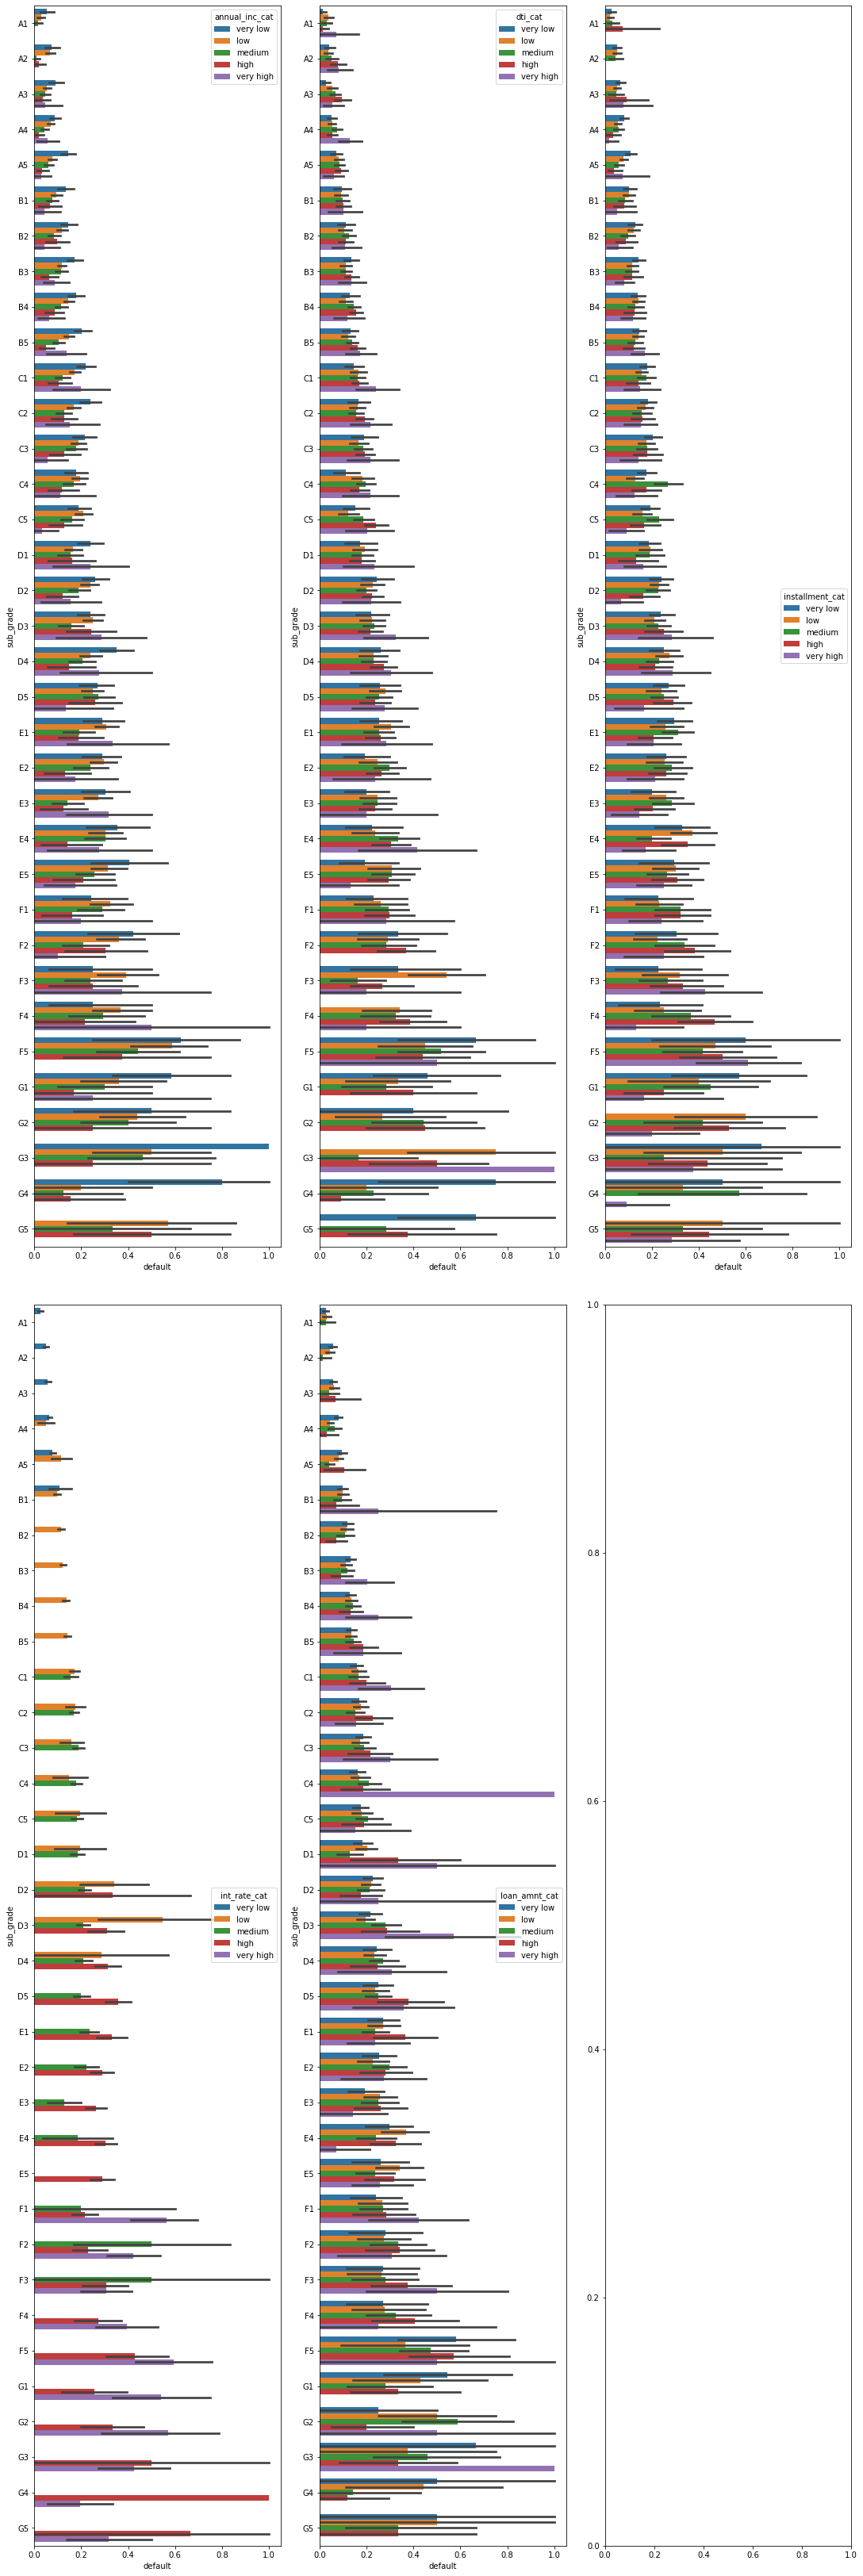

In [187]:
# mean default of numeric columns by sub_grade
fig, ax = plt.subplots(2, 3, figsize=[15, 45], constrained_layout=True)
order = sorted(df.sub_grade.unique().tolist())
for axi, col in enumerate(numeric_cat_cols):
    axes = ax[0, axi] if axi < 3 else ax[1, axi%3]
    sns.barplot(data=df, x='default', y='sub_grade', hue=col, ax=axes, estimator=np.mean, orient='h', order=order)
pass;

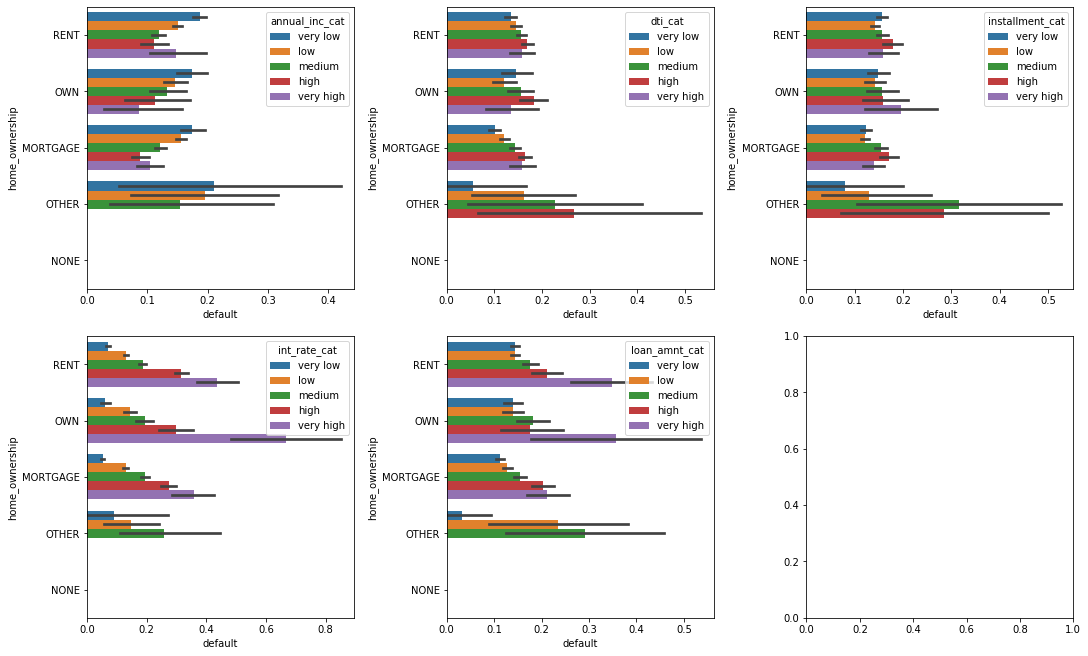

In [189]:
# mean default of numeric columns by home_ownership
fig, ax = plt.subplots(2, 3, figsize=[15, 9], constrained_layout=True)
for axi, col in enumerate(numeric_cat_cols):
    axes = ax[0, axi] if axi < 3 else ax[1, axi%3]
    sns.barplot(data=df, x='default', y='home_ownership', hue=col, ax=axes, estimator=np.mean, orient='h')
pass;

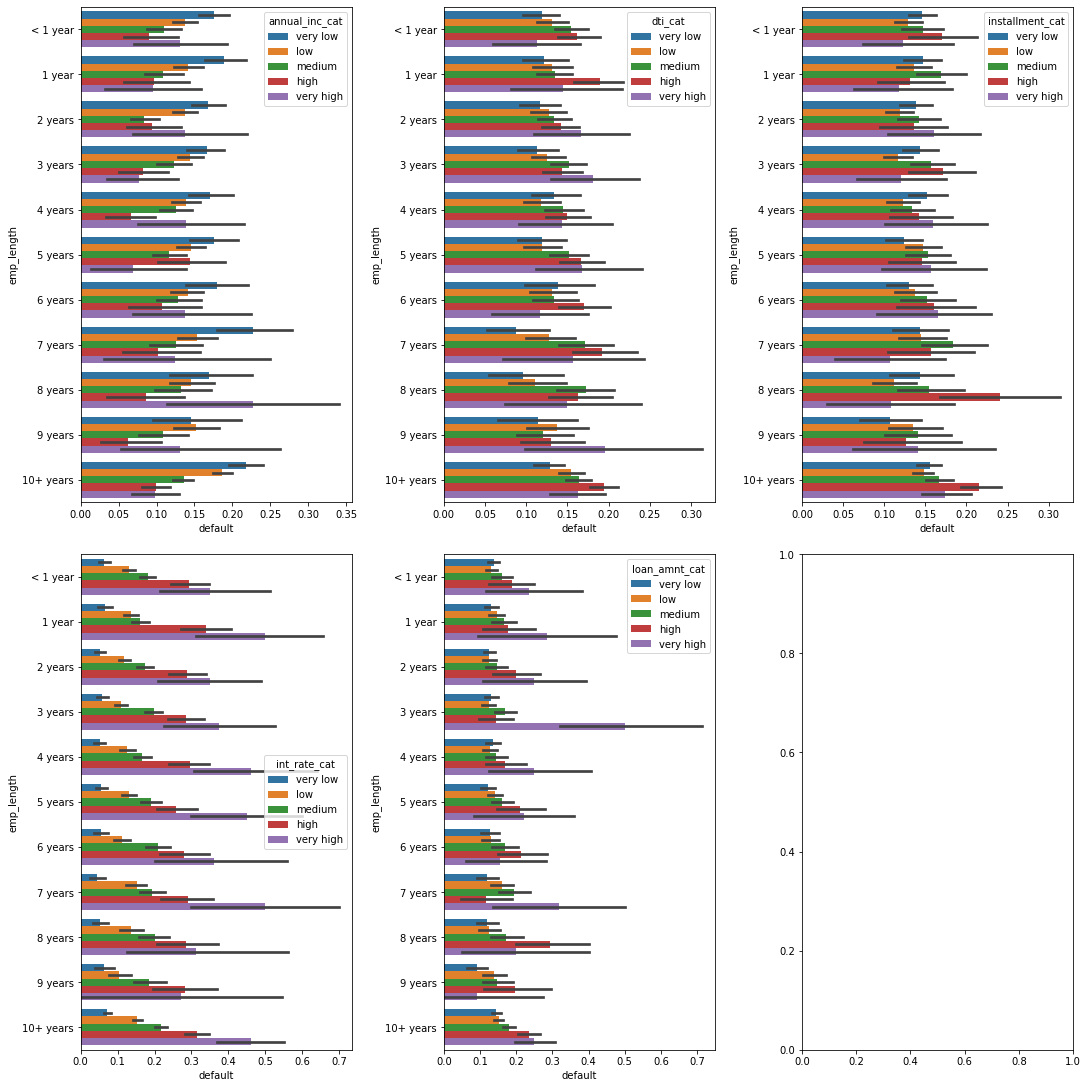

In [195]:
# mean default of numeric columns by emp_length
fig, ax = plt.subplots(2, 3, figsize=[15, 15], constrained_layout=True)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
         '7 years', '8 years', '9 years', '10+ years']
for axi, col in enumerate(numeric_cat_cols):
    axes = ax[0, axi] if axi < 3 else ax[1, axi%3]
    sns.barplot(data=df, x='default', y='emp_length', hue=col, ax=axes, estimator=np.mean, orient='h', order=order)
pass;

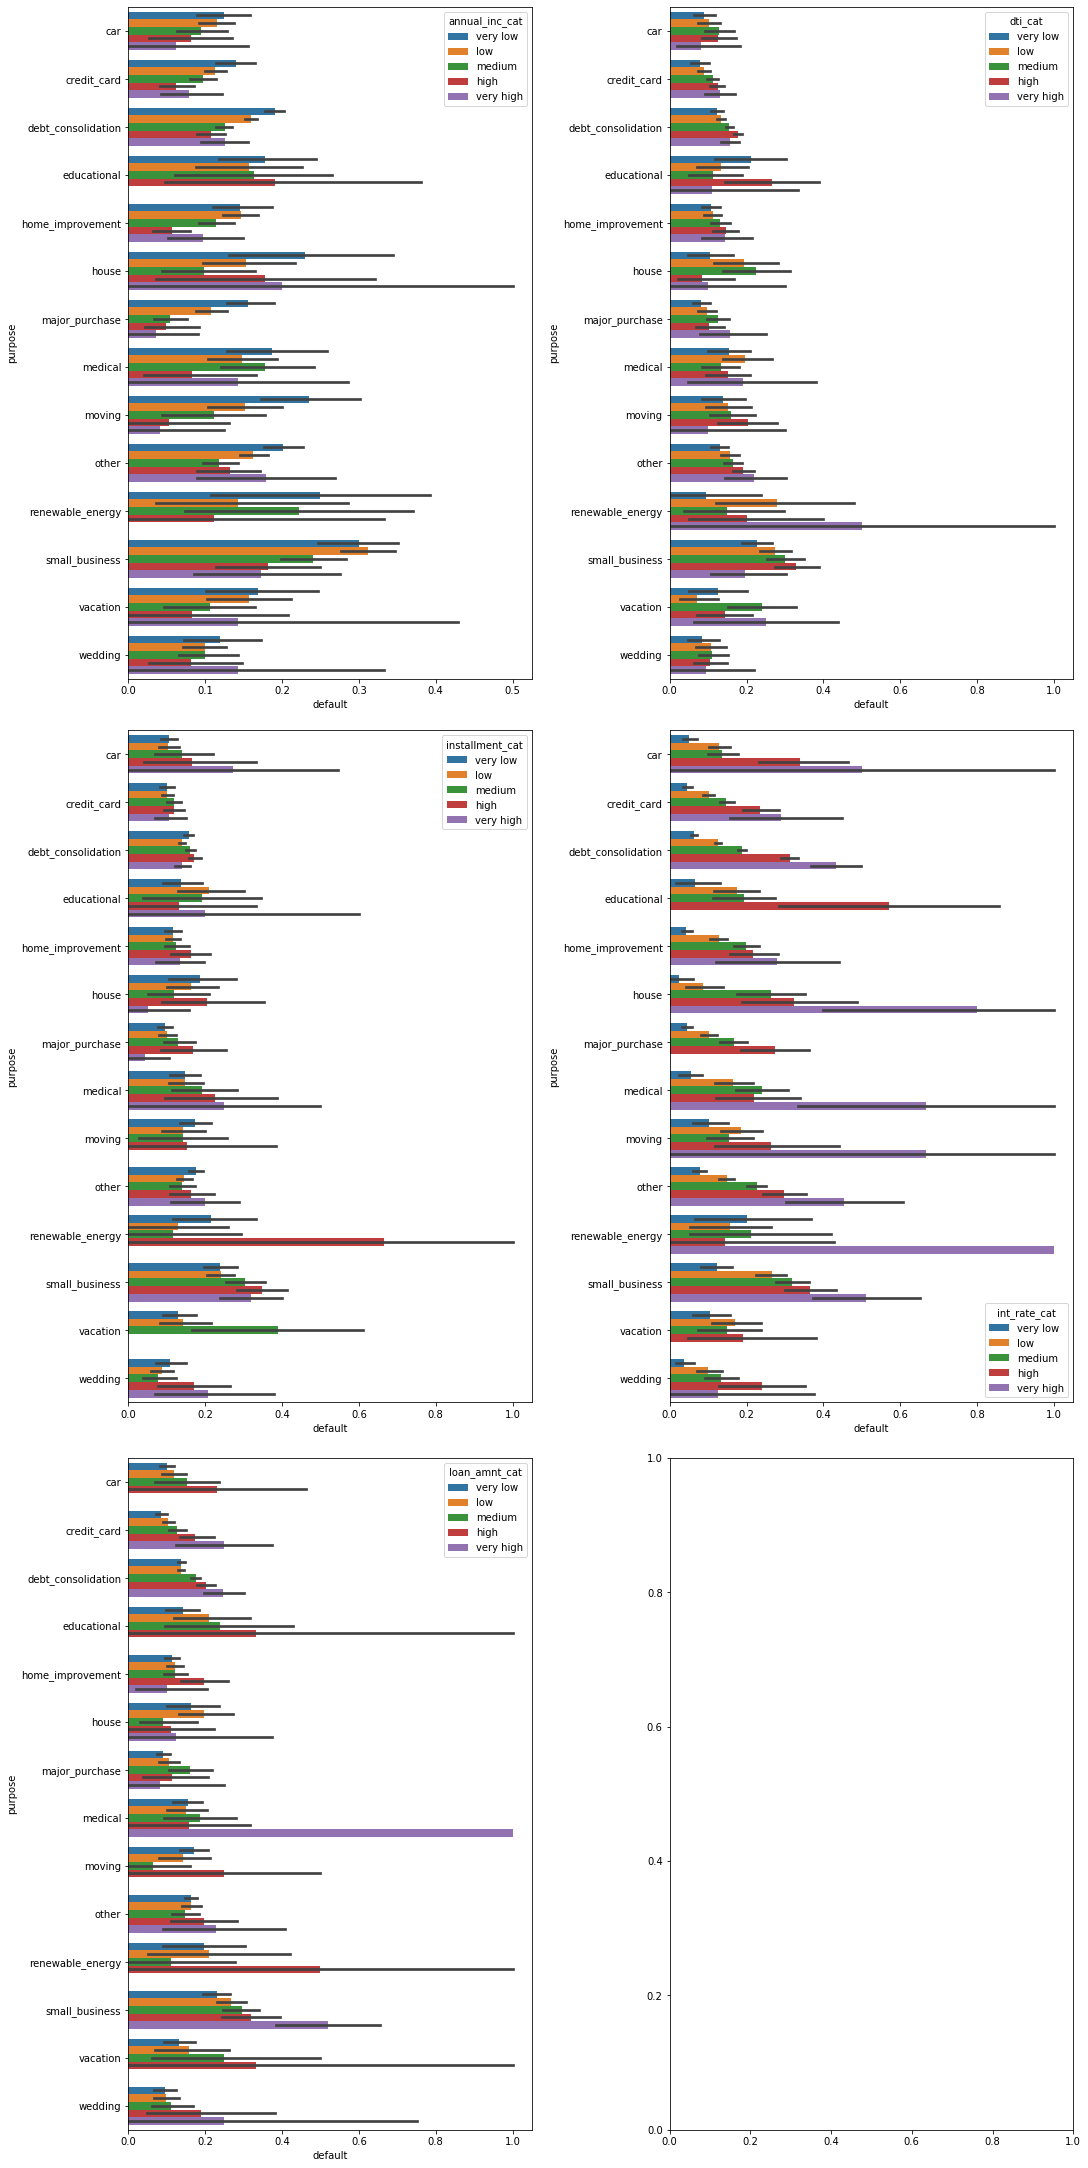

In [201]:
# mean default of numeric columns by purpose
fig, ax = plt.subplots(3, 2, figsize=[15, 30], constrained_layout=True)
order = sorted(df.purpose.unique().tolist())
for axi, col in enumerate(numeric_cat_cols):
    if axi < 2:
        axes = ax[0, axi]
    elif axi < 4:
        axes = ax[1, axi%2]
    else:
        axes = ax[2, axi%2]
    sns.barplot(data=df, x='default', y='purpose', hue=col, ax=axes, estimator=np.mean, orient='h', order=order)
pass;

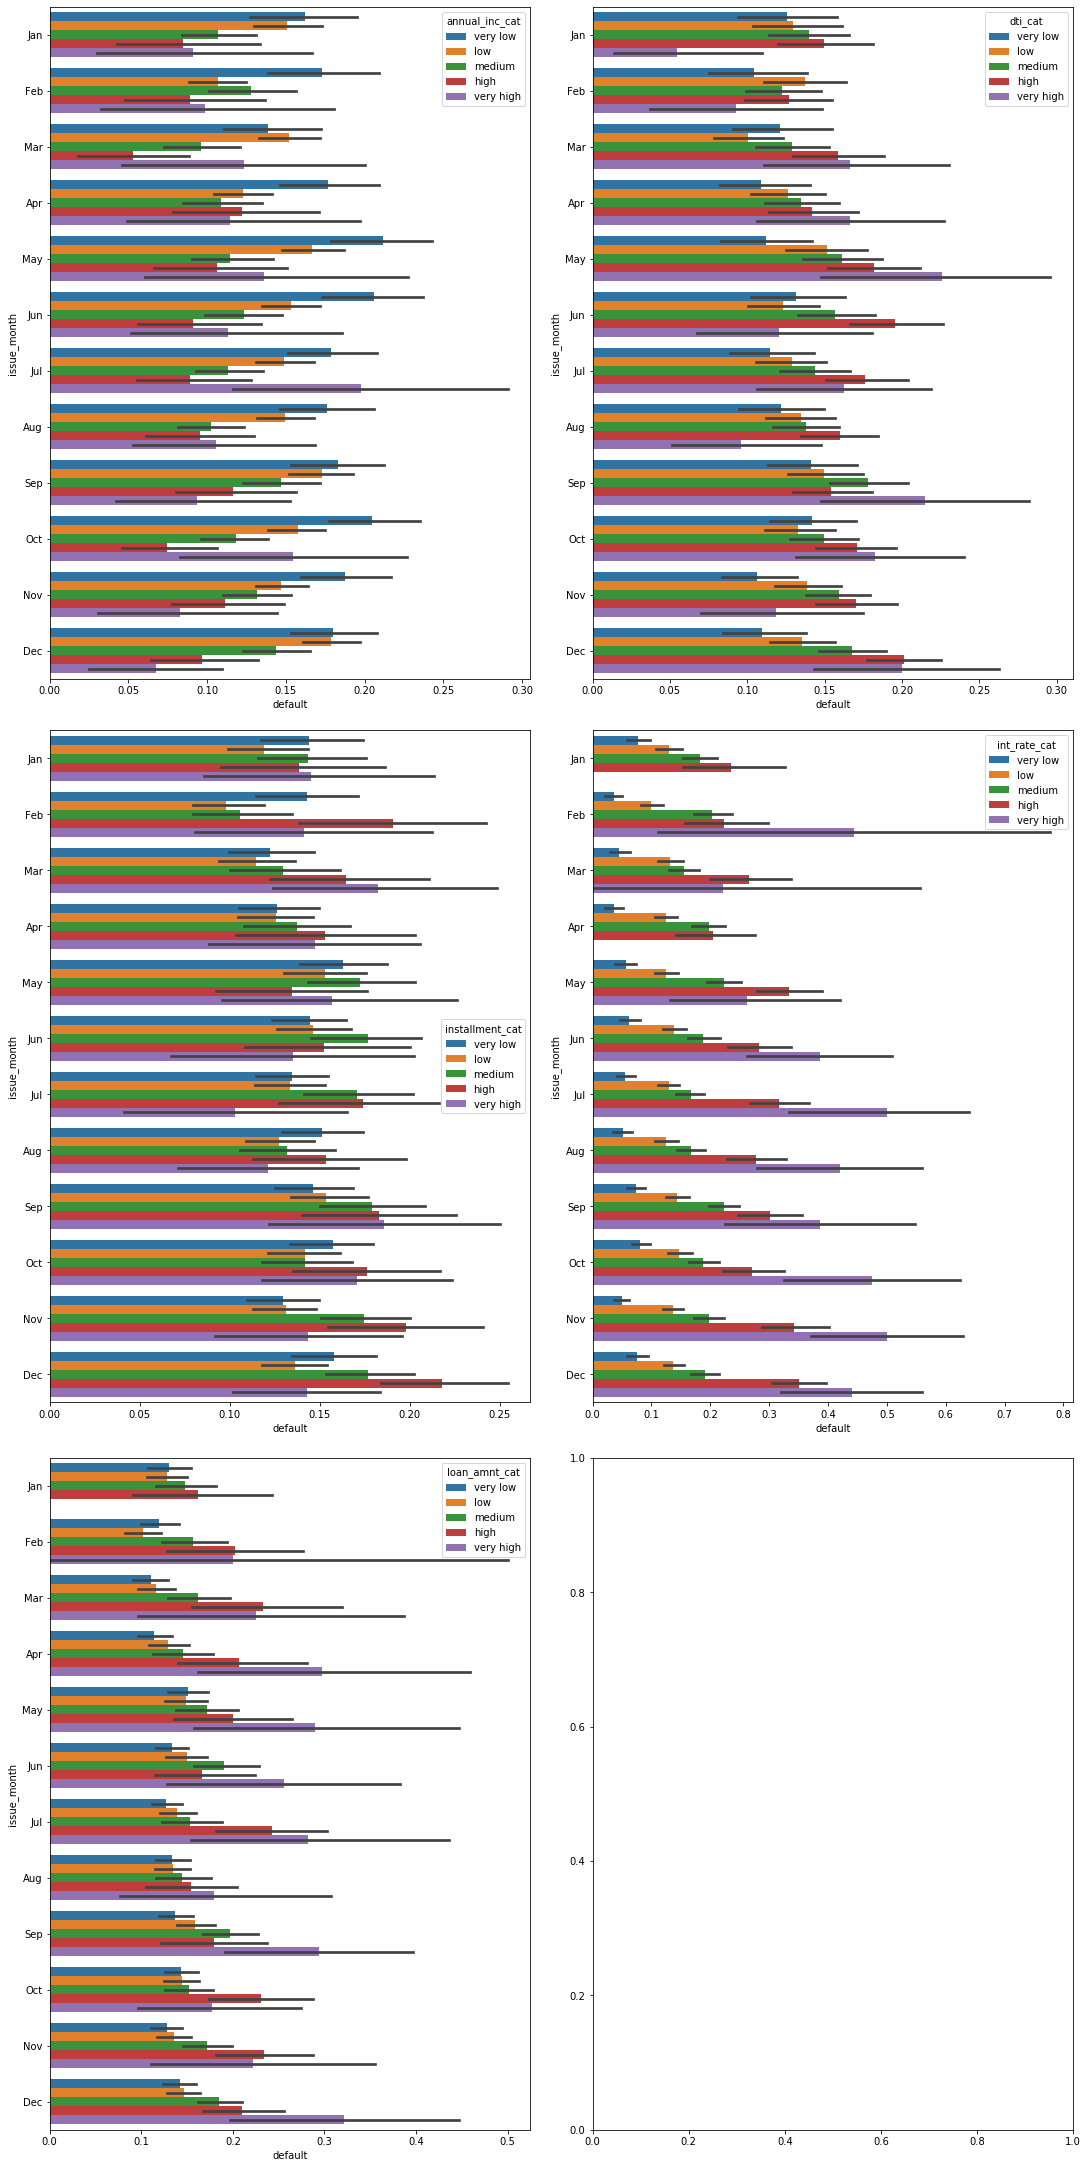

In [202]:
# mean default of numeric columns by issue_month
fig, ax = plt.subplots(3, 2, figsize=[15, 30], constrained_layout=True)
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for axi, col in enumerate(numeric_cat_cols):
    if axi < 2:
        axes = ax[0, axi]
    elif axi < 4:
        axes = ax[1, axi%2]
    else:
        axes = ax[2, axi%2]
    sns.barplot(data=df, x='default', y='issue_month', hue=col, ax=axes, estimator=np.mean, orient='h', order=order)
pass;

In [150]:
# # generate default rate grouped by [category col, numeric_cat_cols]
# for cat_col in categorical_cols:
#     for num_col in numeric_cat_cols:
#         df.groupby([cat_col, num_col])['default'].mean()

In [48]:
numeric_cols

['annual_inc', 'dti', 'installment', 'int_rate', 'loan_amnt']

In [49]:
categorical_cols

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'pub_rec_bankruptcies',
 'issue_month']

In [50]:
# fig, ax = plt.subplots(figsize=[15,6])
# sns.catplot(data=df, x='int_rate', y='emp_length', hue='loan_status', kind='bar', orient='h')

In [51]:
# fig, ax = plt.subplots(figsize=[15,6])
# sns.catplot(data=df, y='loan_status', x='delinq_2yrs', kind='bar', orient='h')

In [52]:
# fig, ax = plt.subplots(figsize=[15,6])
# sns.catplot(data=df, y='grade', hue='loan_status', kind='count', orient='h')

In [53]:
# df.groupby(['loan_status', 'grade'])['id'].agg('count')

In [54]:
# fig, ax = plt.subplots(figsize=[15,15])
# sns.heatmap(df_numeric.corr())

As loan amount increases, the minimun annual income considered increases.

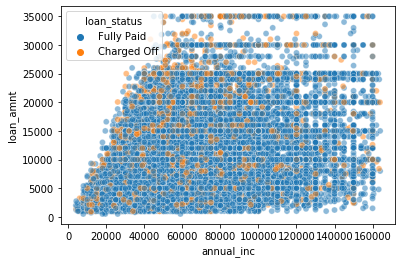

In [39]:
sns.scatterplot(data=df, hue='loan_status', x='annual_inc', y='loan_amnt', alpha=0.5)
pass;